In [1]:
# Imports
# !pip install torchinfo
import torch
import torch.nn.functional as F
import torch.utils.data as Data
from torchvision import datasets, transforms
from torchinfo import summary
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import random
import cv2
import Comparison_v2 as CM
import os
import DataSetting_v2 as DS

### Loading

In [2]:
most_datadir = f'../dataset/0509/make20_30-split/'
most_data = DS.ModalityLoader(data_dir=most_datadir, mmap_mode='r', modalities={'rimg', 'tag'})
most_gt = most_data.test_data 

least_datadir = f'../dataset/0509/make20_300-split/'
least_data = DS.ModalityLoader(data_dir=least_datadir, mmap_mode='r', modalities={'rimg', 'tag'})
least_gt = least_data.test_data

Loading from ../dataset/0509/make20_30-split/


  0%|          | 0/20 [00:00<?, ?it/s]

Loading from ../dataset/0509/make20_300-split/


  0%|          | 0/20 [00:00<?, ?it/s]

In [3]:
print(len(most_gt['tag']), len(least_gt['tag']))

5701 5299


In [4]:
subjects = {
    '30Center': '../saved/240626_30_V08E2/',
    '100Center': '../saved/240626_100_V08E2_/',
    '300Center': '../saved/240626_300_V08E2_/',
    
    '30Center_WIL': '../saved/240626_30_V08E2_WIL/',
    '100Center_WIL': '../saved/240626_100_V08E2_WIL/',
    '300Center_WIL': '../saved/240626_300_V08E2_WIL/',
    
    '300BBX_FP': '../saved/240607_300_BBX/',
    'AE': '../saved/240608_AE/',
}

In [5]:
RP = CM.ResultProcess(subjects=subjects, most_gt=most_gt, least_gt=least_gt)
RP.load_preds()

Loading 30Center...
30Center loaded GT of (5701, 128, 128) as float32
30Center loaded S_PRED of (5701, 128, 128) as float32
30Center loaded GT_CTR of (5701, 2) as float32
30Center loaded S_CTR of (5701, 2) as float32
30Center loaded GT_DPT of (5701,) as float32
30Center loaded S_DPT of (5701,) as float32
30Center loaded TAG of (5701, 4) as float32
Loading 100Center...
100Center loaded GT of (5599, 128, 128) as float32
100Center loaded S_PRED of (5599, 128, 128) as float32
100Center loaded GT_CTR of (5599, 2) as float32
100Center loaded S_CTR of (5599, 2) as float32
100Center loaded GT_DPT of (5599,) as float32
100Center loaded S_DPT of (5599,) as float32
100Center loaded TAG of (5599, 4) as float32
Loading 300Center...
300Center loaded GT of (5299, 128, 128) as float32
300Center loaded S_PRED of (5299, 128, 128) as float32
300Center loaded GT_CTR of (5299, 2) as float32
300Center loaded S_CTR of (5299, 2) as float32
300Center loaded GT_DPT of (5299,) as float32
300Center loaded S_DPT o

30Center reconstructing...


  0%|          | 0/5701 [00:00<?, ?it/s]

/home/bob/datastore/Models/Comparison_v2.py:521: UserWarning: Using a target size (torch.Size([1, 128, 226])) that is different to the input size (torch.Size([128, 226])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  torch.from_numpy(self.gt[gt_ind])).numpy()


Done
 Reconstruction finished. Failure count = 0
100Center reconstructing...


  0%|          | 0/5599 [00:00<?, ?it/s]

Done
 Reconstruction finished. Failure count = 0
300Center reconstructing...


  0%|          | 0/5299 [00:00<?, ?it/s]

Done
 Reconstruction finished. Failure count = 0
30Center_WIL reconstructing...


  0%|          | 0/5701 [00:00<?, ?it/s]

Done
 Reconstruction finished. Failure count = 0
100Center_WIL reconstructing...


  0%|          | 0/5599 [00:00<?, ?it/s]

Done
 Reconstruction finished. Failure count = 0
300Center_WIL reconstructing...


  0%|          | 0/5299 [00:00<?, ?it/s]

Done
 Reconstruction finished. Failure count = 0
300BBX_FP reconstructing...


  0%|          | 0/5299 [00:00<?, ?it/s]

/home/bob/datastore/Models/Comparison_v2.py:399: UserWarning: Using a target size (torch.Size([1, 128, 226])) that is different to the input size (torch.Size([128, 226])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  torch.from_numpy(self.gt[gt_ind])).numpy()


Done
 Reconstruction finished. Failure count = 0
AE resizing & calculating loss...


  0%|          | 0/5701 [00:00<?, ?it/s]

/home/bob/datastore/Models/Comparison_v2.py:193: UserWarning: Using a target size (torch.Size([1, 128, 226])) that is different to the input size (torch.Size([128, 226])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  torch.from_numpy(self.gt[gt_ind])).numpy()


Done!
30Center calculating 2D correlation...

  0%|          | 0/5701 [00:00<?, ?it/s]

Done!
100Center calculating 2D correlation...

  0%|          | 0/5599 [00:00<?, ?it/s]

Done!
300Center calculating 2D correlation...

  0%|          | 0/5299 [00:00<?, ?it/s]

Done!
30Center_WIL calculating 2D correlation...

  0%|          | 0/5701 [00:00<?, ?it/s]

Done!
100Center_WIL calculating 2D correlation...

  0%|          | 0/5599 [00:00<?, ?it/s]

Done!
300Center_WIL calculating 2D correlation...

  0%|          | 0/5299 [00:00<?, ?it/s]

Done!
300BBX_FP calculating 2D correlation...

  0%|          | 0/5299 [00:00<?, ?it/s]

Done!
AE calculating 2D correlation...

  0%|          | 0/5701 [00:00<?, ?it/s]

Done!
30Center calculating segment mean...Done
100Center calculating segment mean...Done
300Center calculating segment mean...Done
30Center_WIL calculating segment mean...Done
100Center_WIL calculating segment mean...Done
300Center_WIL calculating segment mean...Done
300BBX_FP calculating segment mean...Done
AE calculating segment mean...Done


<Figure size 1440x720 with 0 Axes>

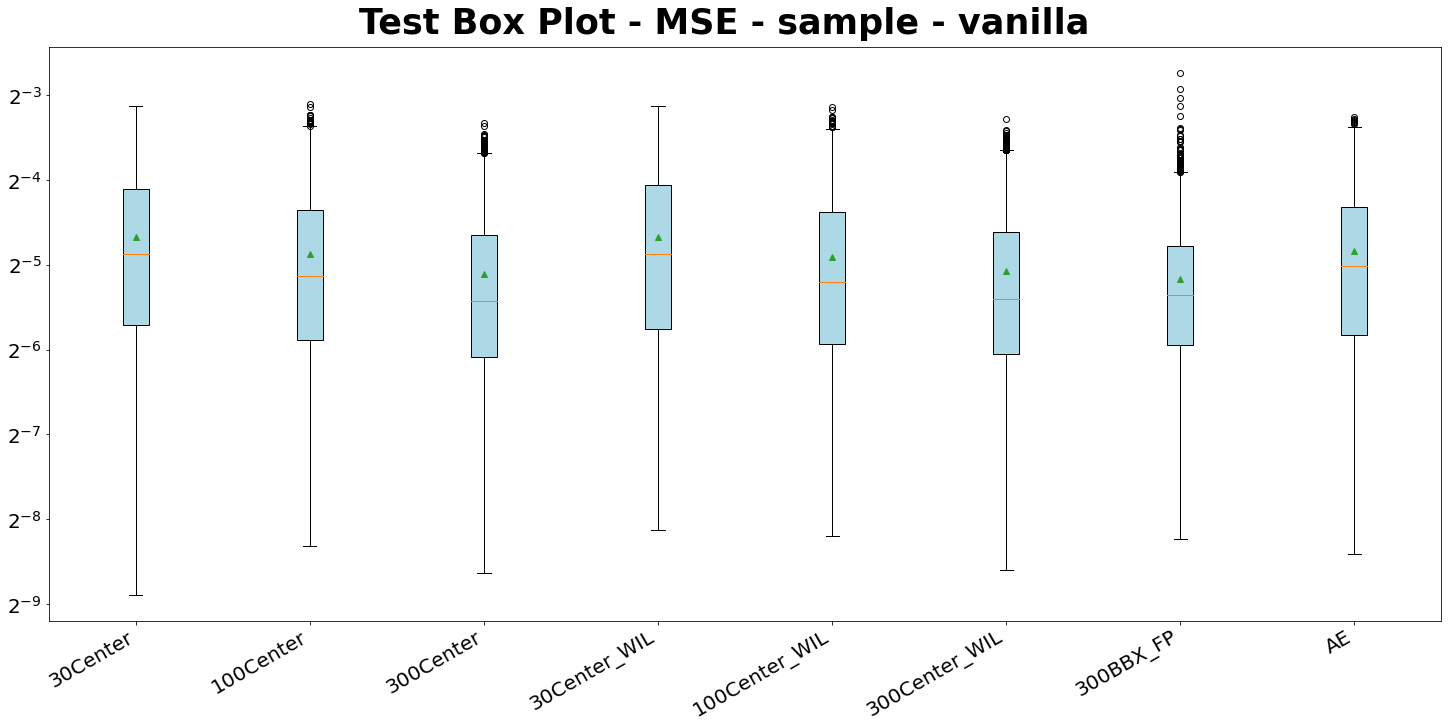

<Figure size 1440x720 with 0 Axes>

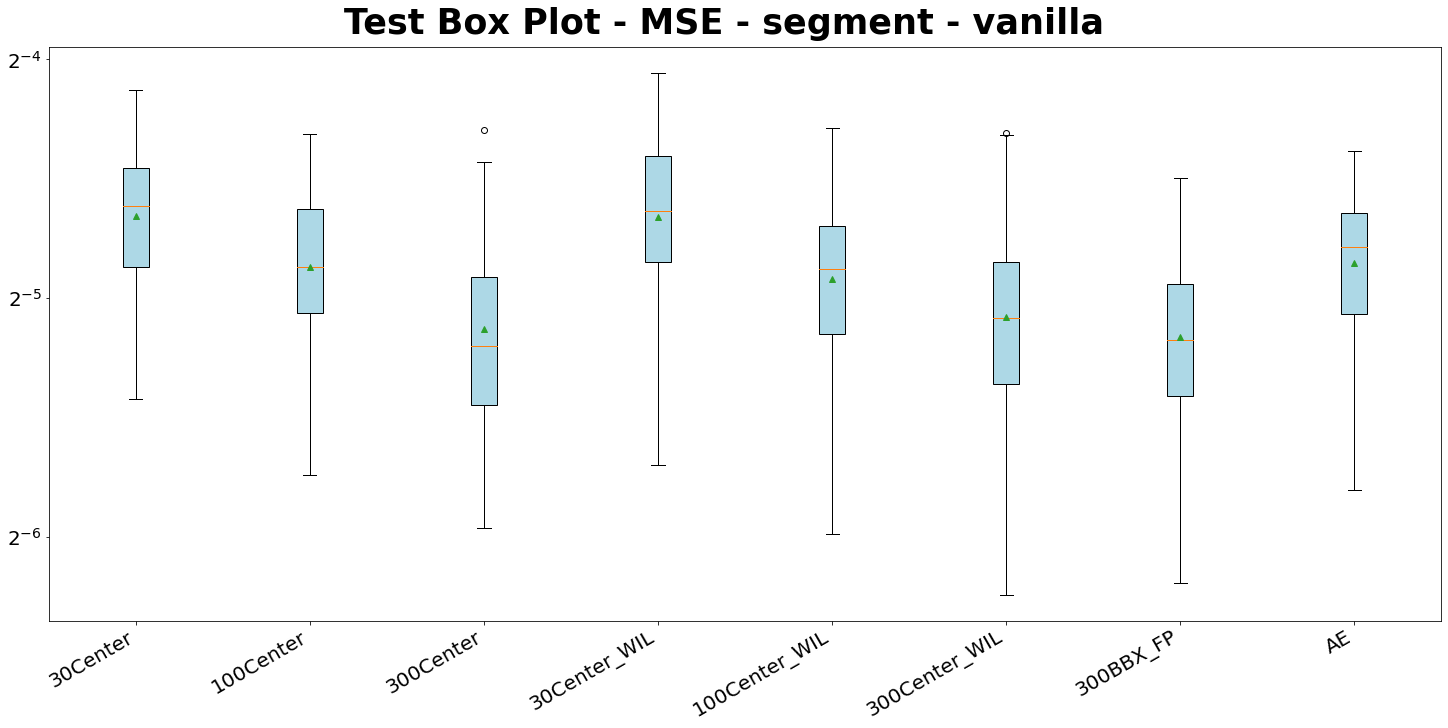

<Figure size 1440x720 with 0 Axes>

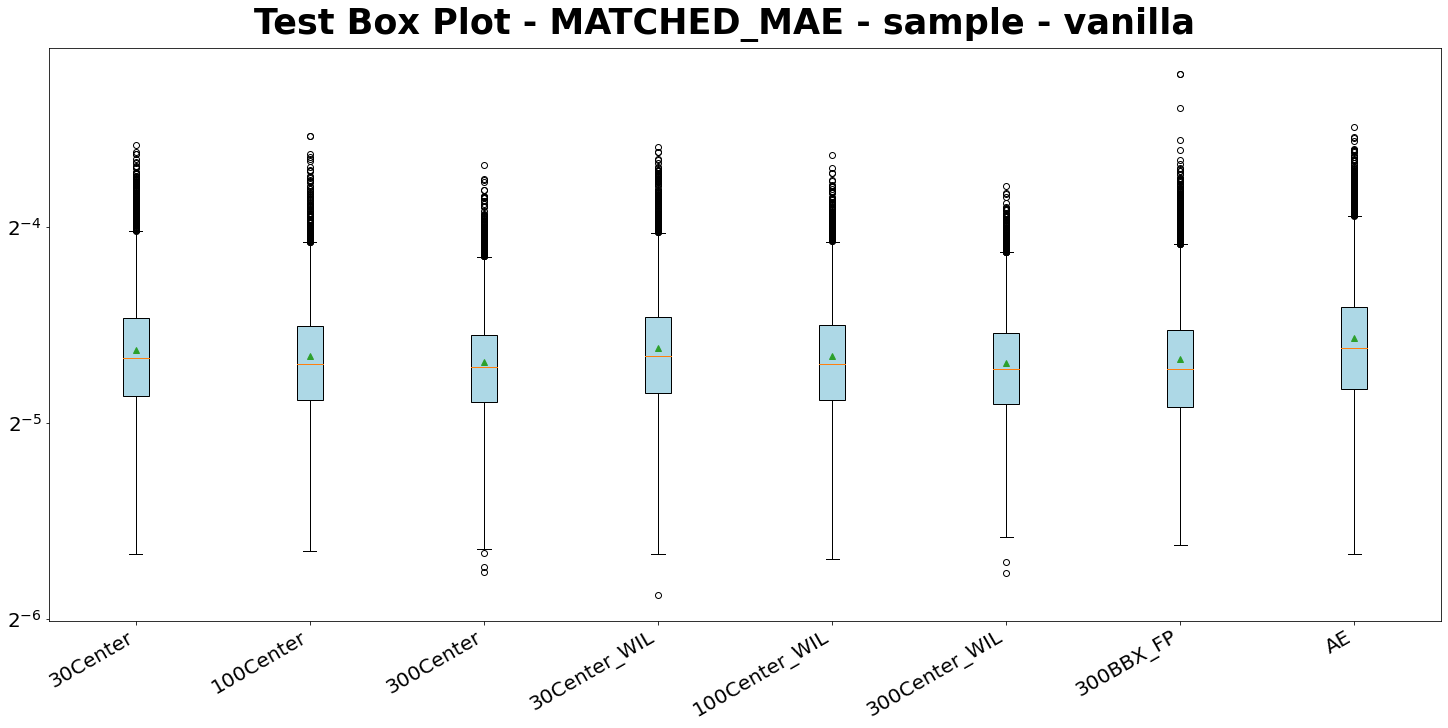

<Figure size 1440x720 with 0 Axes>

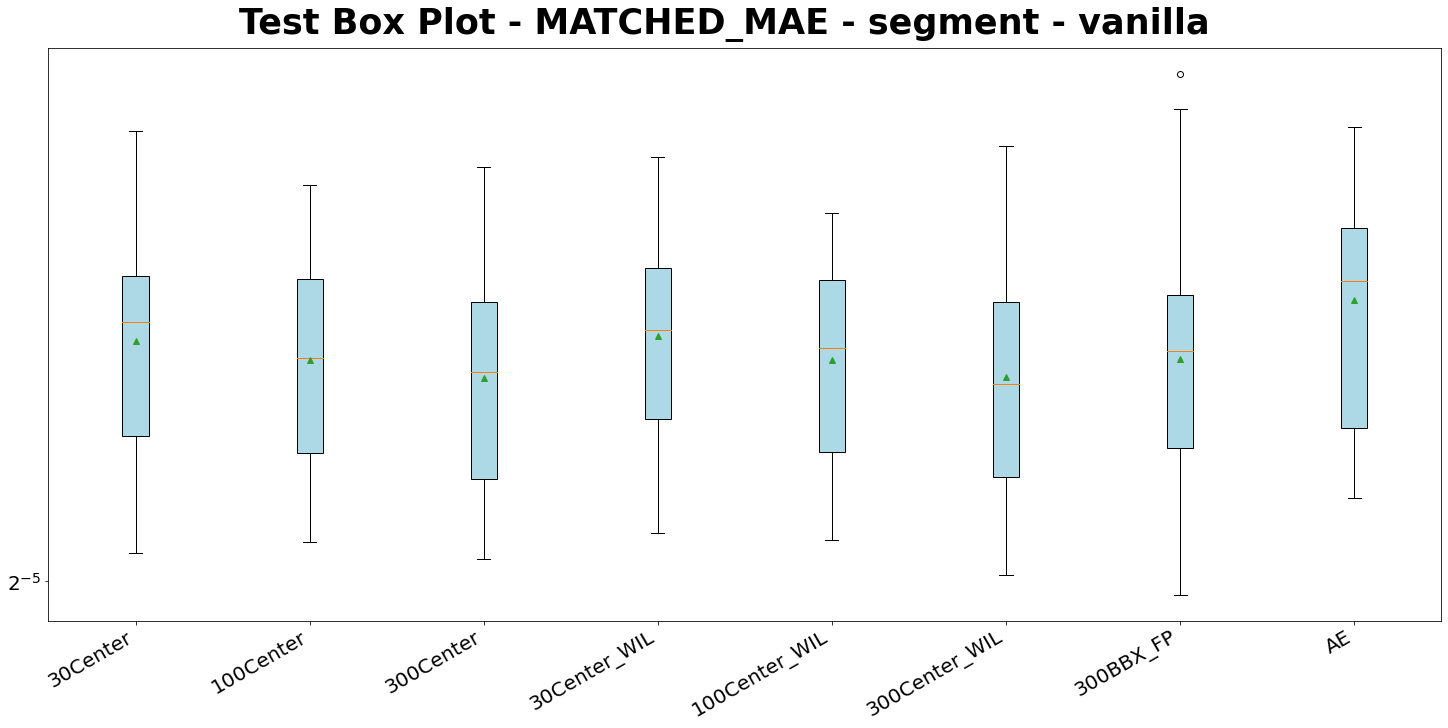

<Figure size 1440x720 with 0 Axes>

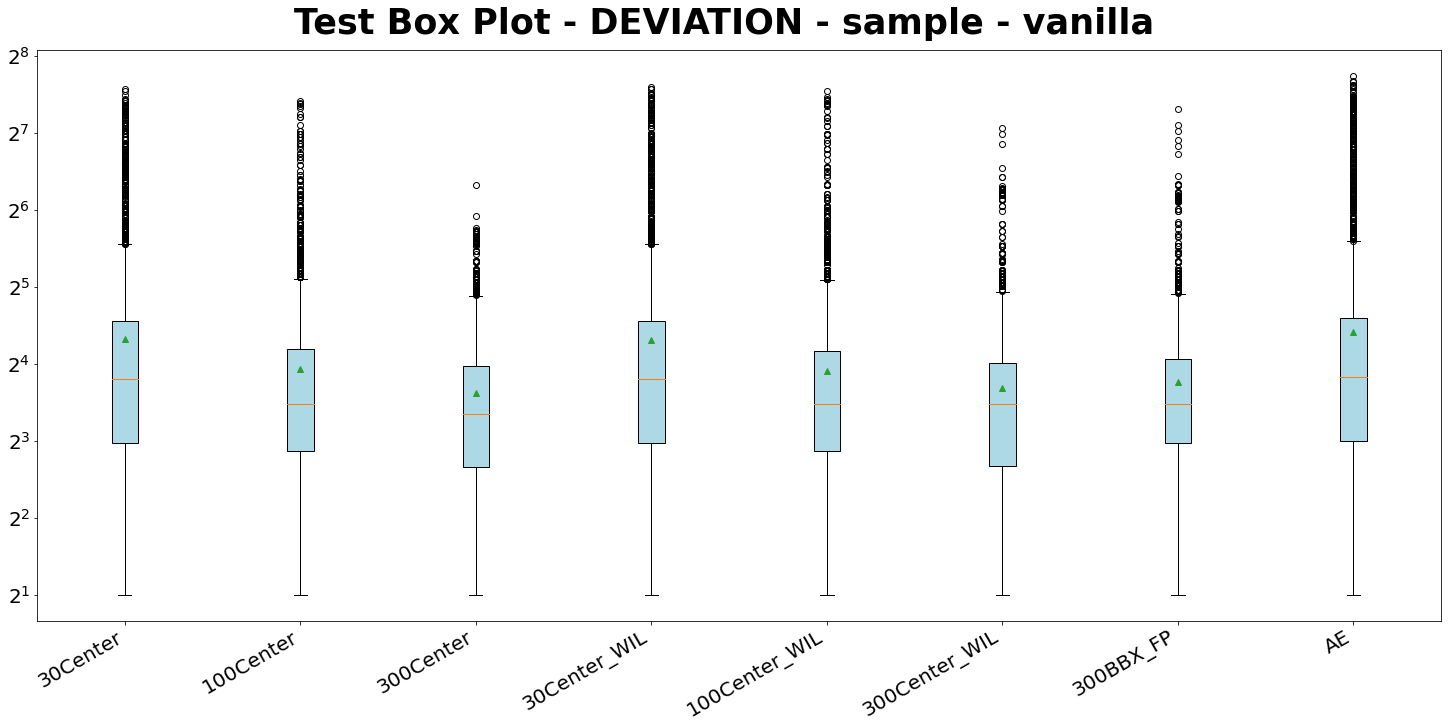

<Figure size 1440x720 with 0 Axes>

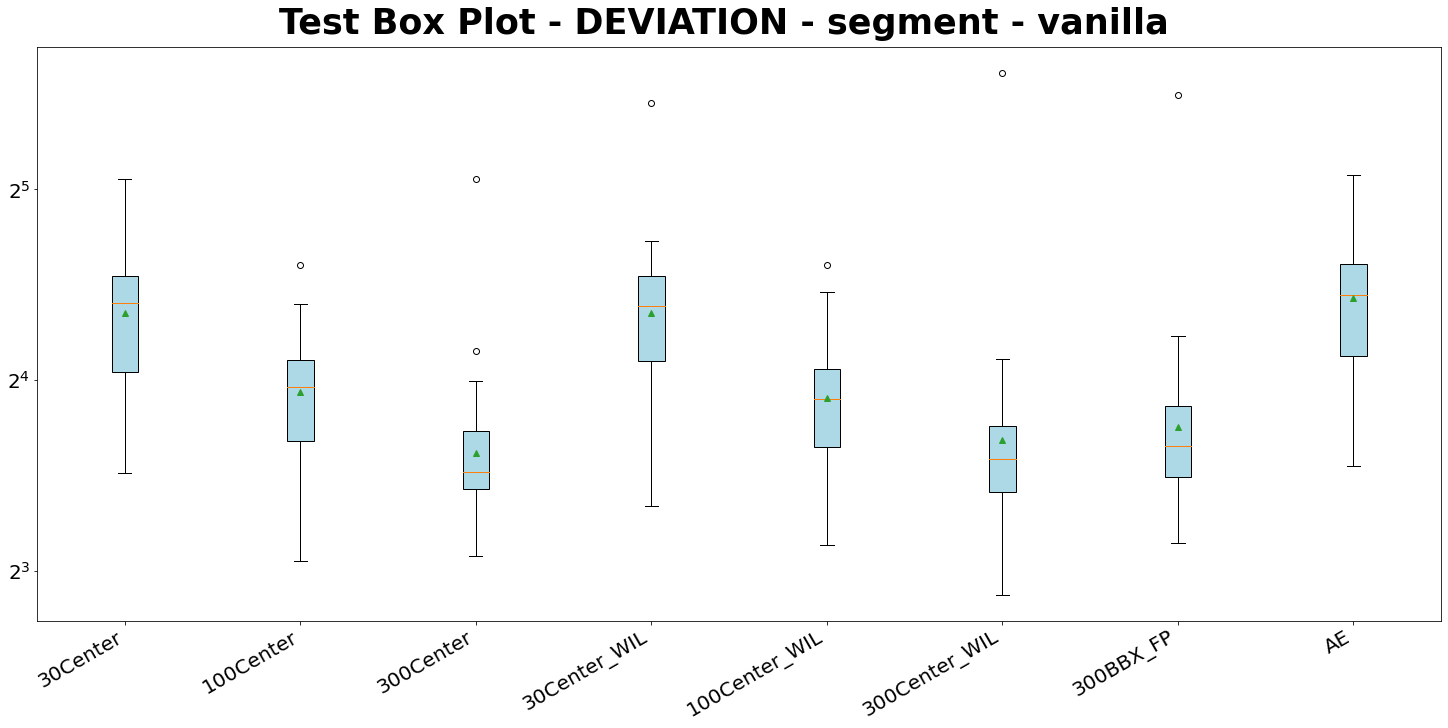

<Figure size 1440x720 with 0 Axes>

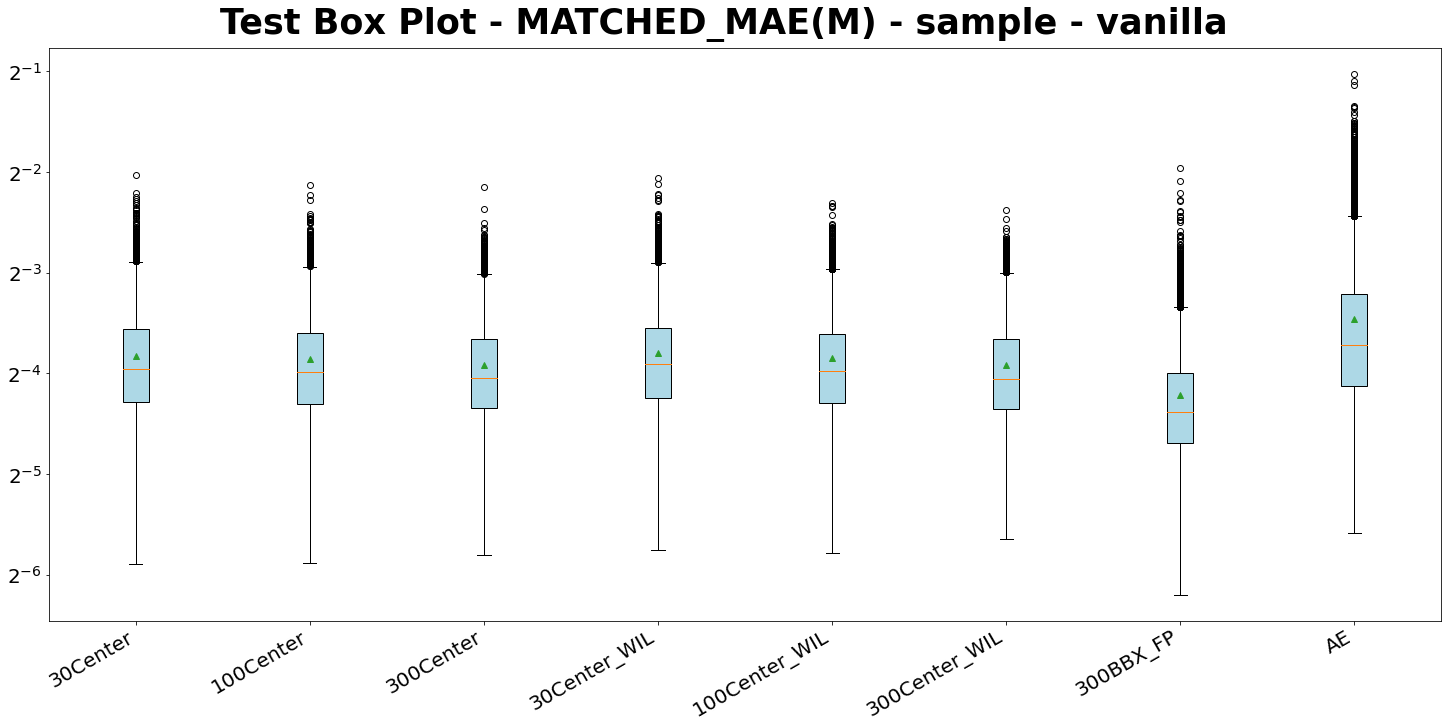

<Figure size 1440x720 with 0 Axes>

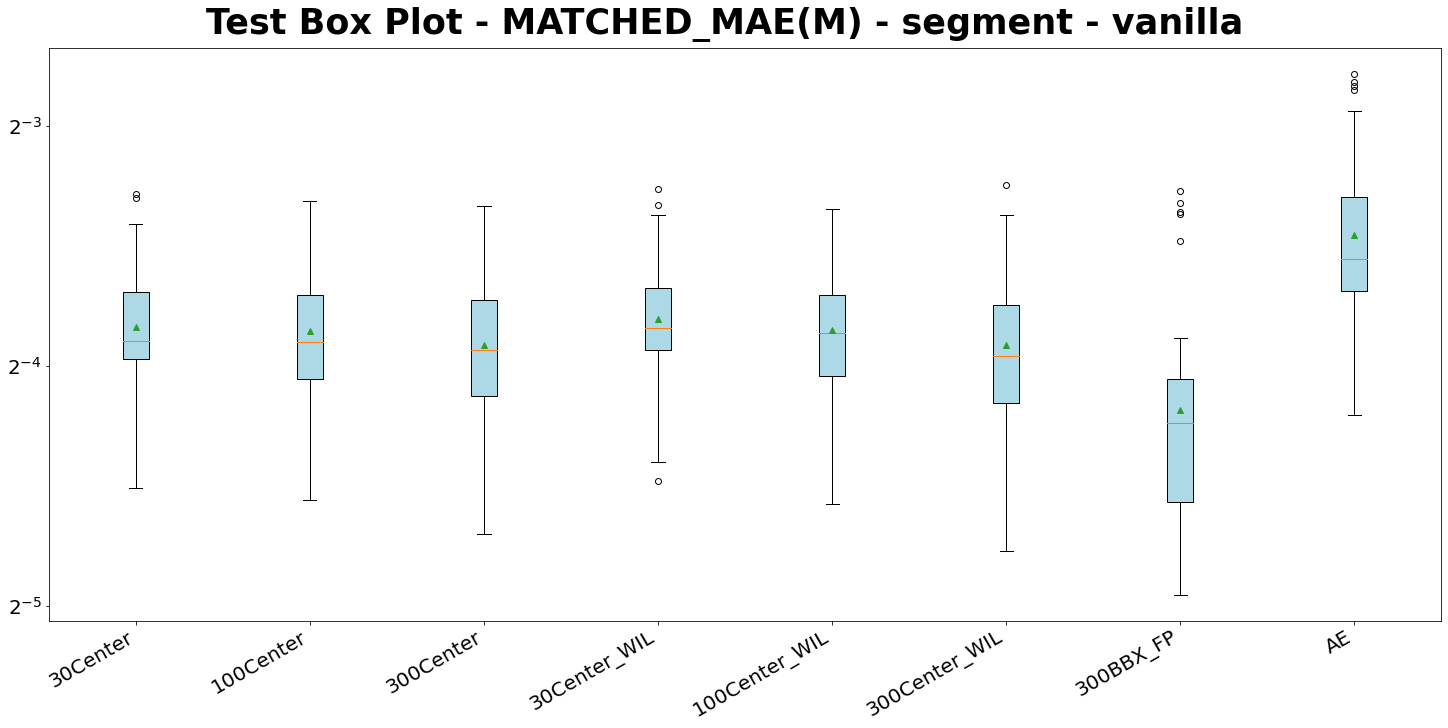

<Figure size 1440x720 with 0 Axes>

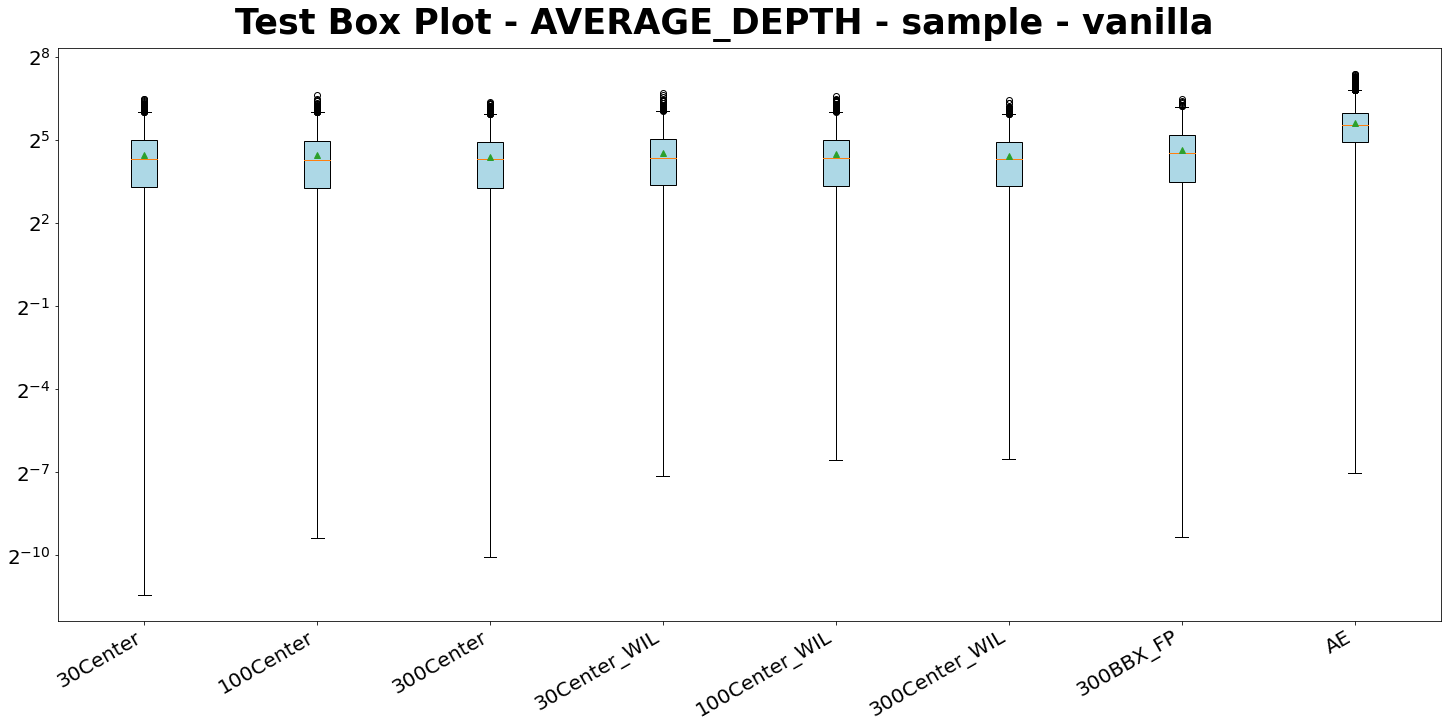

<Figure size 1440x720 with 0 Axes>

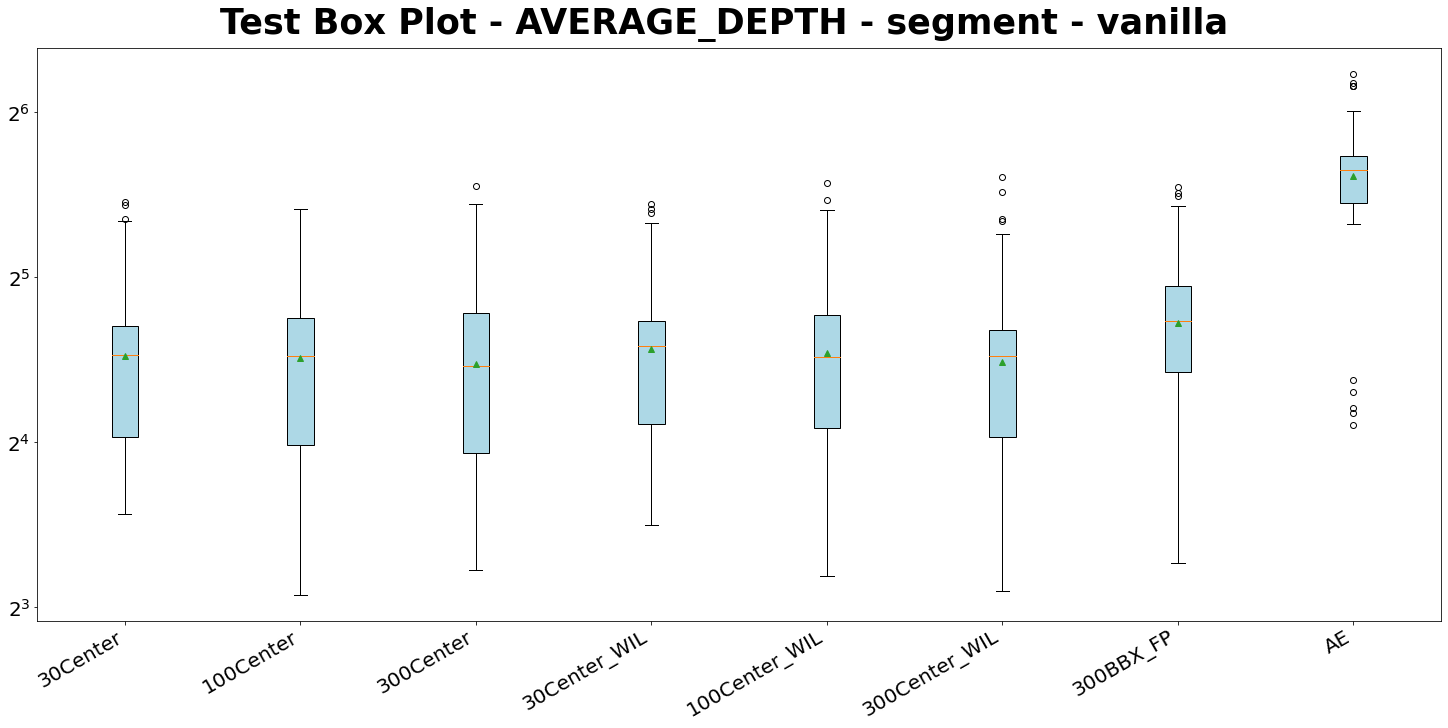

In [7]:
#RP.sample()
RP.resize()
RP.matching_mae()
RP.segment_mean()
for item in ('mse', 'matched_mae', 'deviation', 'matched_mae(m)', 'average_depth'):
    for level in ('sample', 'segment'):
        RP.boxplot(item=item, level=level, source='vanilla')
        #RP.cdfplot(item=item, level=level, source='vanilla')

### Visualizations

<Figure size 1440x720 with 0 Axes>

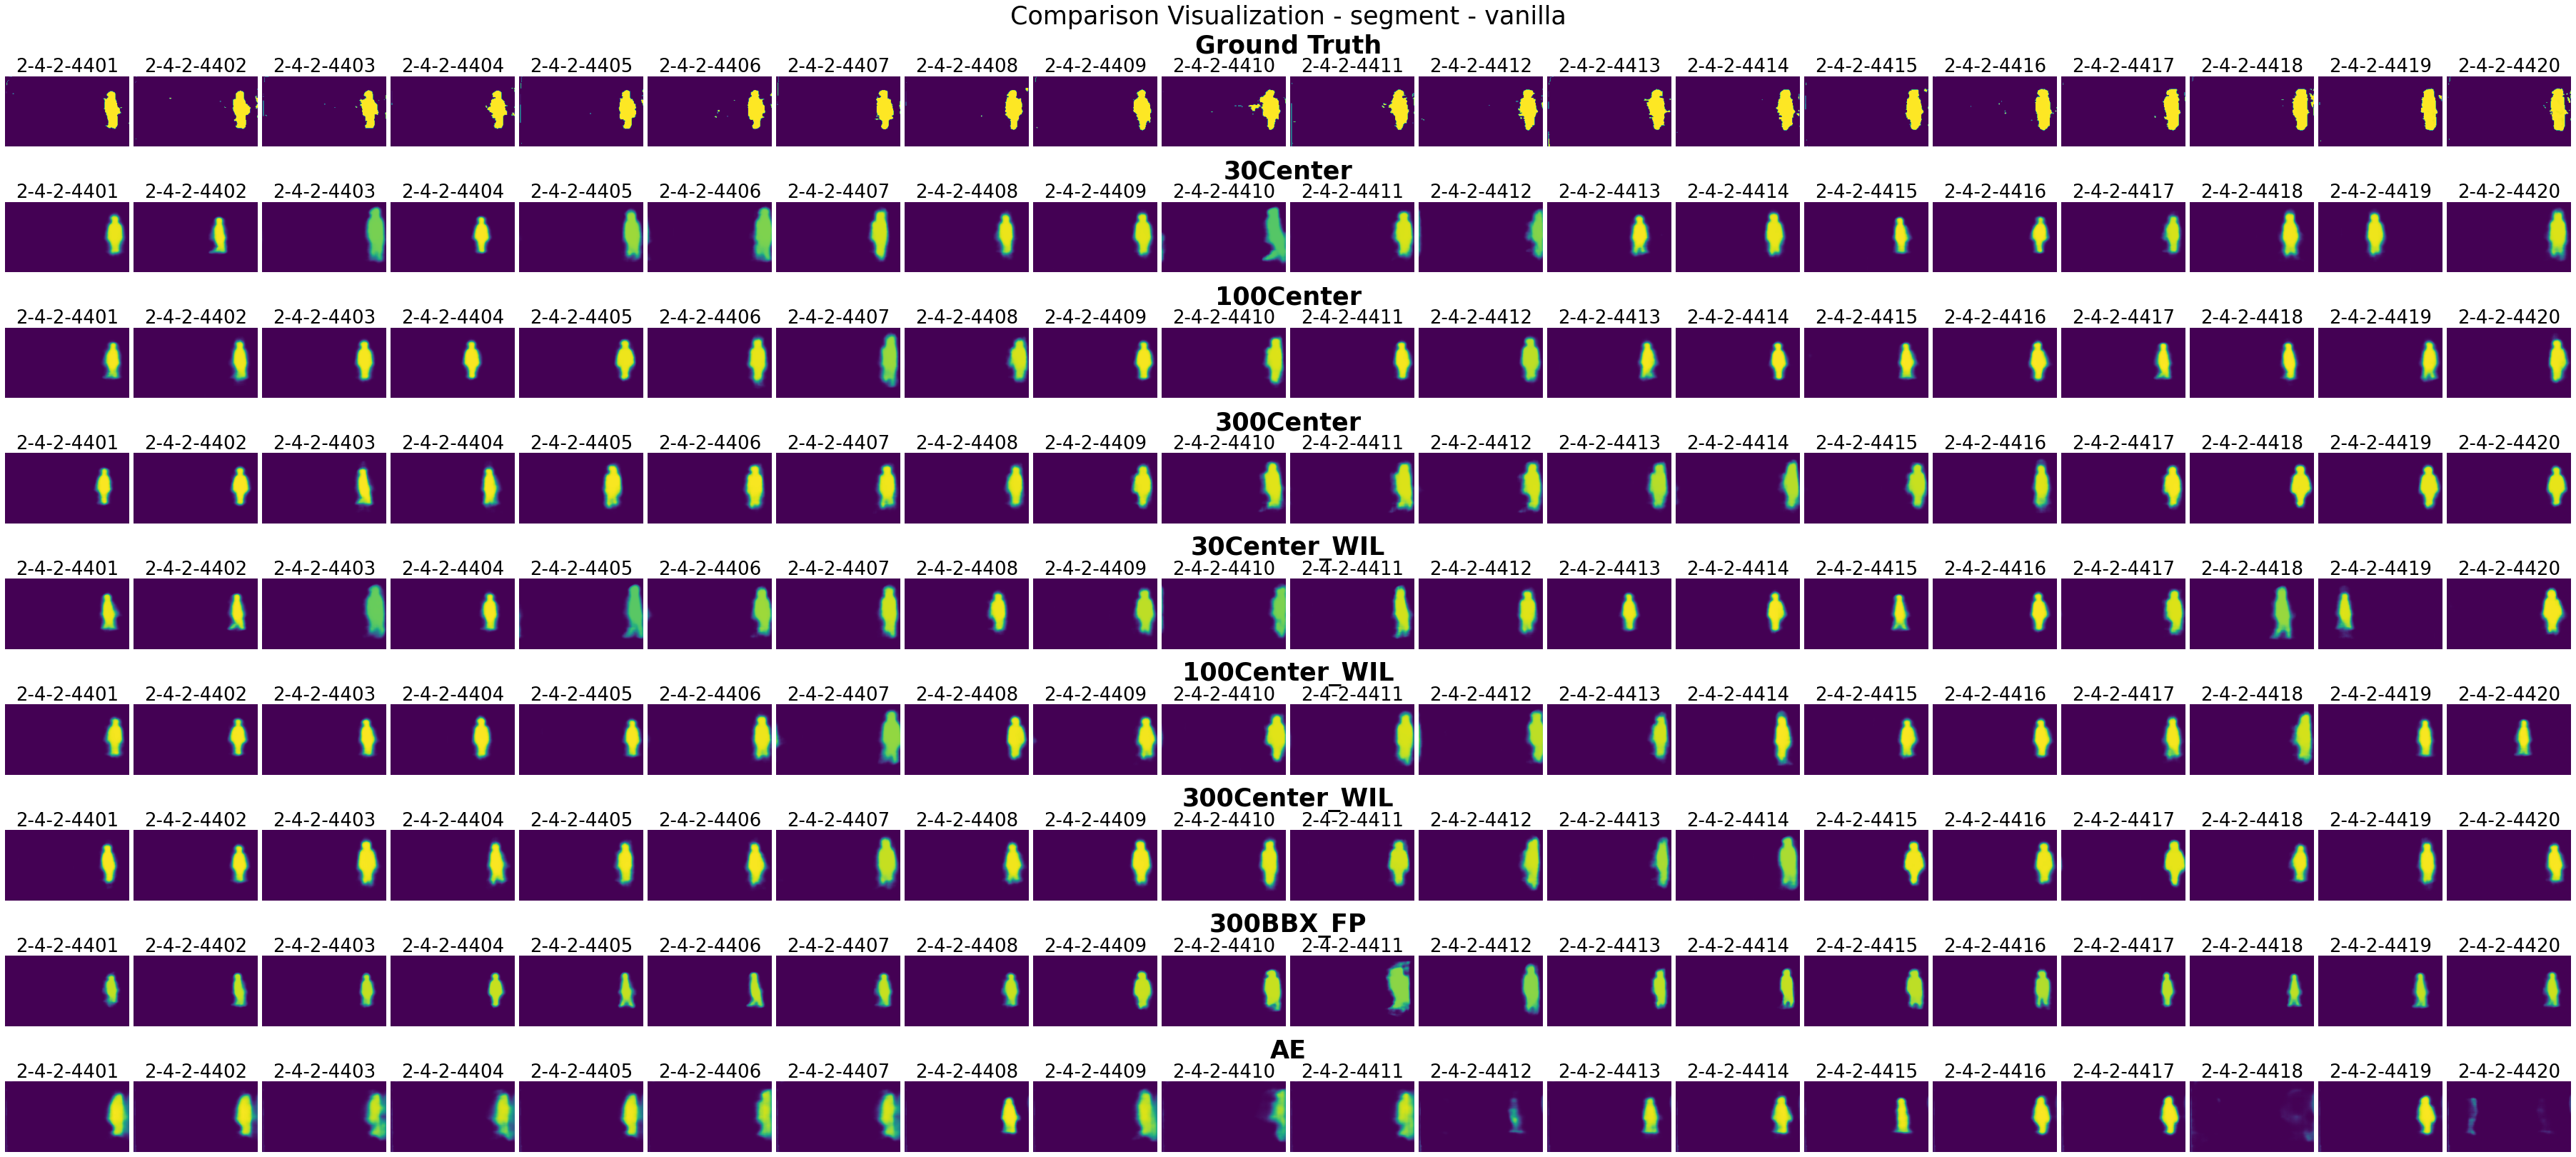

/opt/conda/lib/python3.7/site-packages/numpy/core/shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


<Figure size 3600x1620 with 0 Axes>

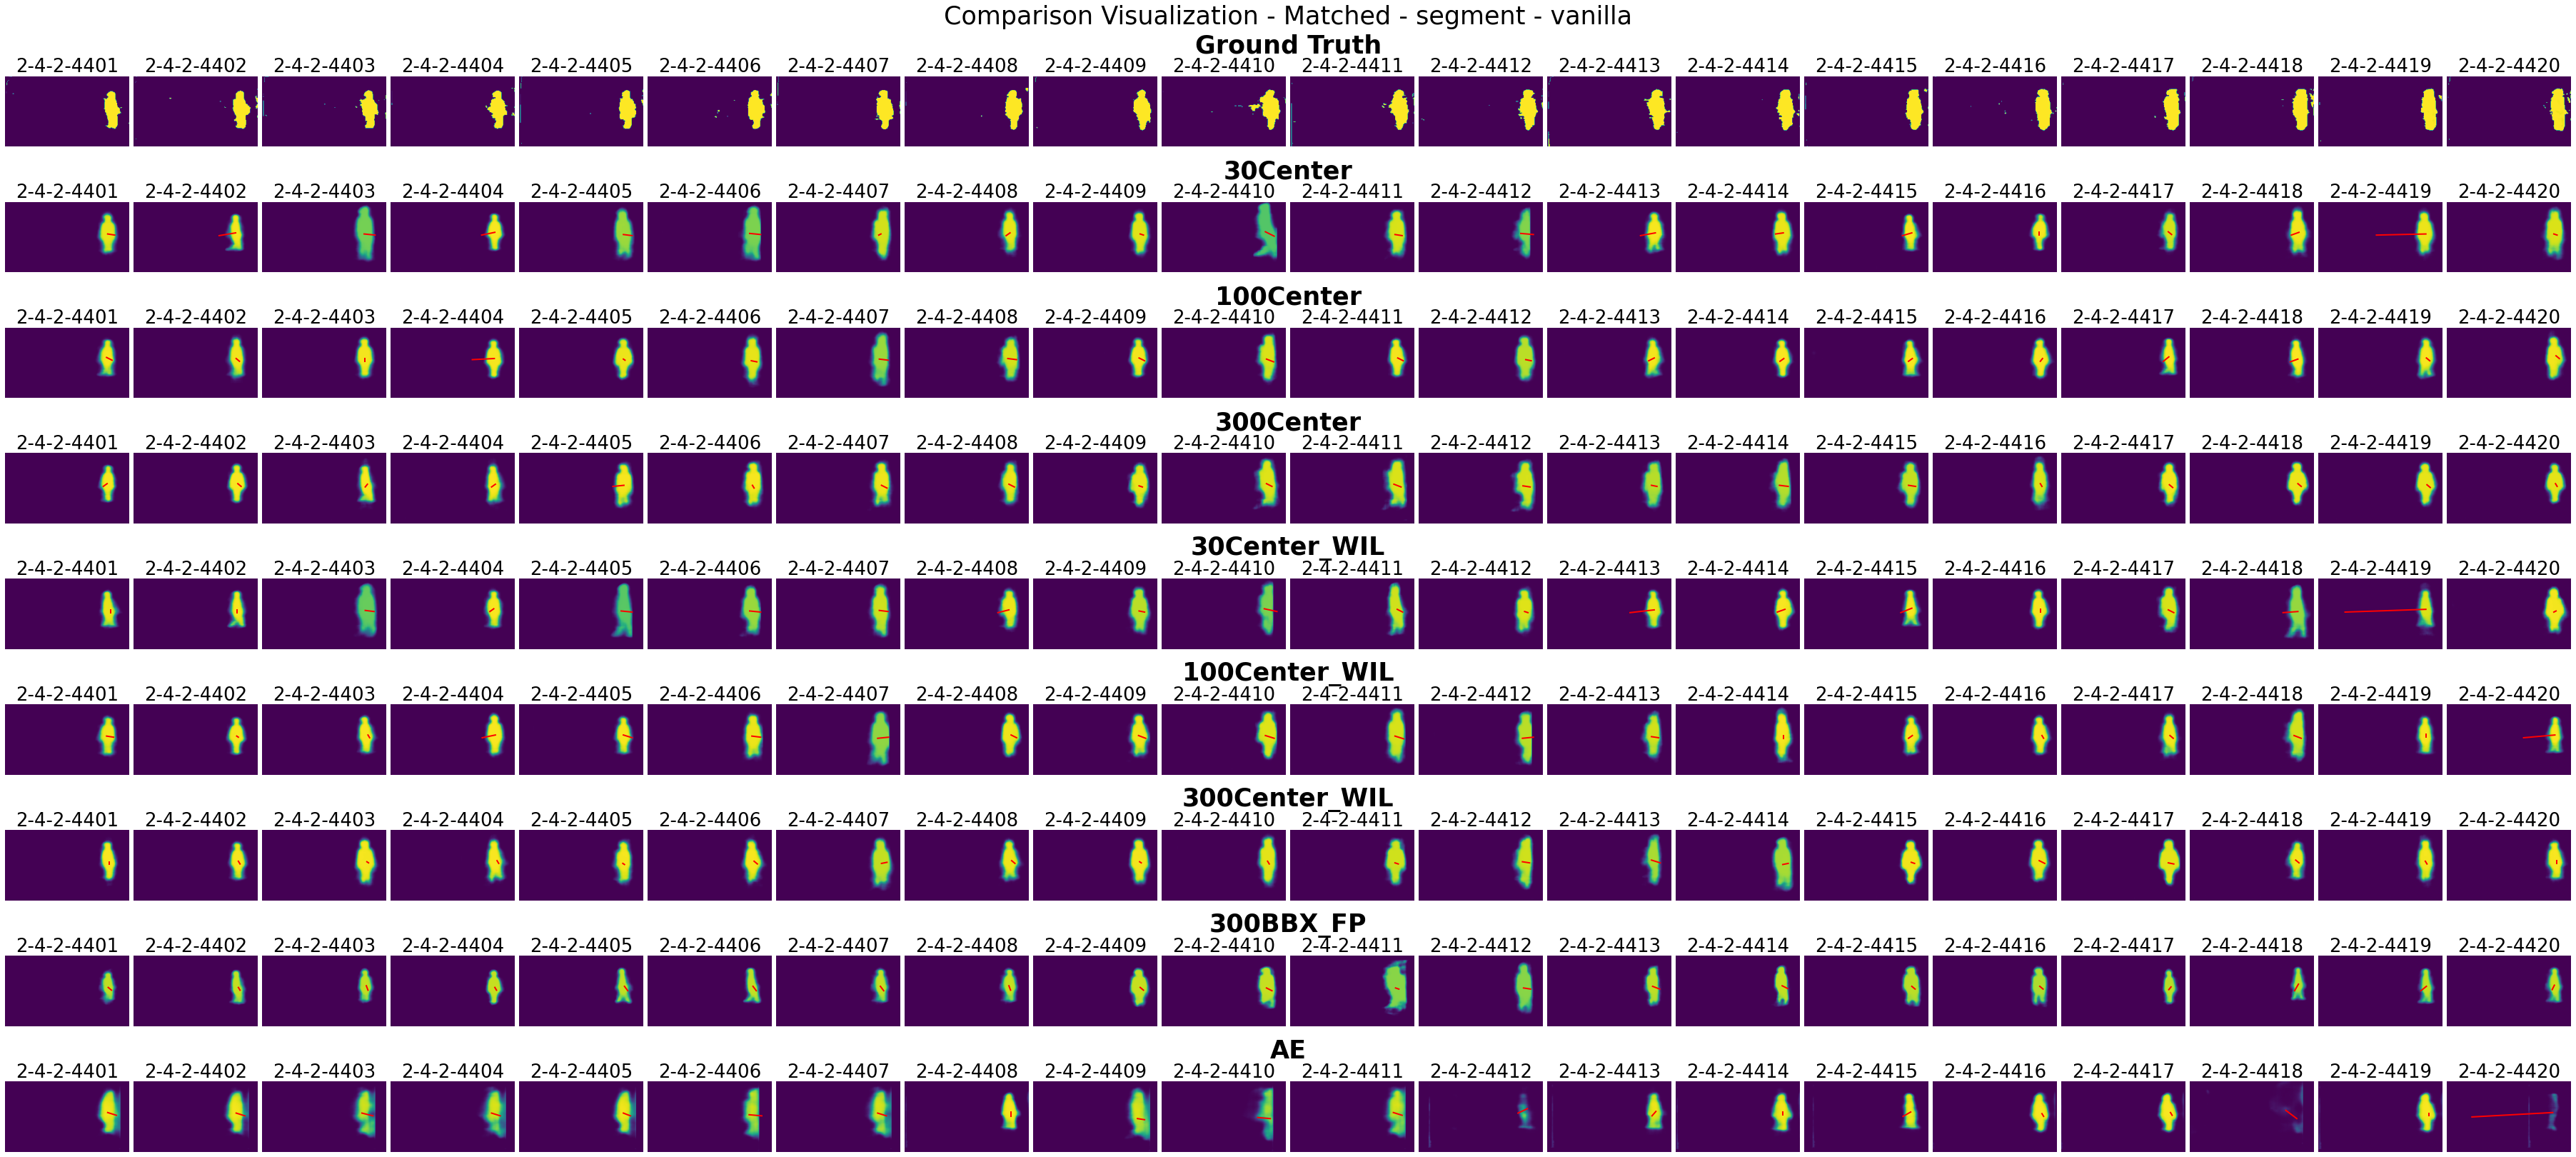

In [8]:
RP.visualize(matched=False, level='segment', source='vanilla')
RP.visualize(matched=True, level='segment', source='vanilla')

### Post-processing

30Center post processing...Done!
30Center reconstructing...


  0%|          | 0/5701 [00:00<?, ?it/s]

/home/bob/datastore/Models/Comparison_v2.py:521: UserWarning: Using a target size (torch.Size([1, 128, 226])) that is different to the input size (torch.Size([128, 226])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  torch.from_numpy(self.gt[gt_ind])).numpy()


Done
 Reconstruction finished. Failure count = 0
30Center calculating 2D correlation...

  0%|          | 0/5701 [00:00<?, ?it/s]

Done!
30Center_WIL post processing...Done!
30Center_WIL reconstructing...


  0%|          | 0/5701 [00:00<?, ?it/s]

Done
 Reconstruction finished. Failure count = 0
30Center_WIL calculating 2D correlation...

  0%|          | 0/5701 [00:00<?, ?it/s]

Done!
100Center post processing...Done!
100Center reconstructing...


  0%|          | 0/5599 [00:00<?, ?it/s]

Done
 Reconstruction finished. Failure count = 0
100Center calculating 2D correlation...

  0%|          | 0/5599 [00:00<?, ?it/s]

Done!
100Center_WIL post processing...Done!
100Center_WIL reconstructing...


  0%|          | 0/5599 [00:00<?, ?it/s]

Done
 Reconstruction finished. Failure count = 0
100Center_WIL calculating 2D correlation...

  0%|          | 0/5599 [00:00<?, ?it/s]

Done!
300Center post processing...Done!
300Center reconstructing...


  0%|          | 0/5299 [00:00<?, ?it/s]

Done
 Reconstruction finished. Failure count = 0
300Center calculating 2D correlation...

  0%|          | 0/5299 [00:00<?, ?it/s]

Done!
300Center_WIL post processing...Done!
300Center_WIL reconstructing...


  0%|          | 0/5299 [00:00<?, ?it/s]

Done
 Reconstruction finished. Failure count = 0
300Center_WIL calculating 2D correlation...

  0%|          | 0/5299 [00:00<?, ?it/s]

Done!
30Center calculating segment mean...Done
30Center_WIL calculating segment mean...Done
100Center calculating segment mean...Done
100Center_WIL calculating segment mean...Done
300Center calculating segment mean...Done
300Center_WIL calculating segment mean...Done


<Figure size 3600x1620 with 0 Axes>

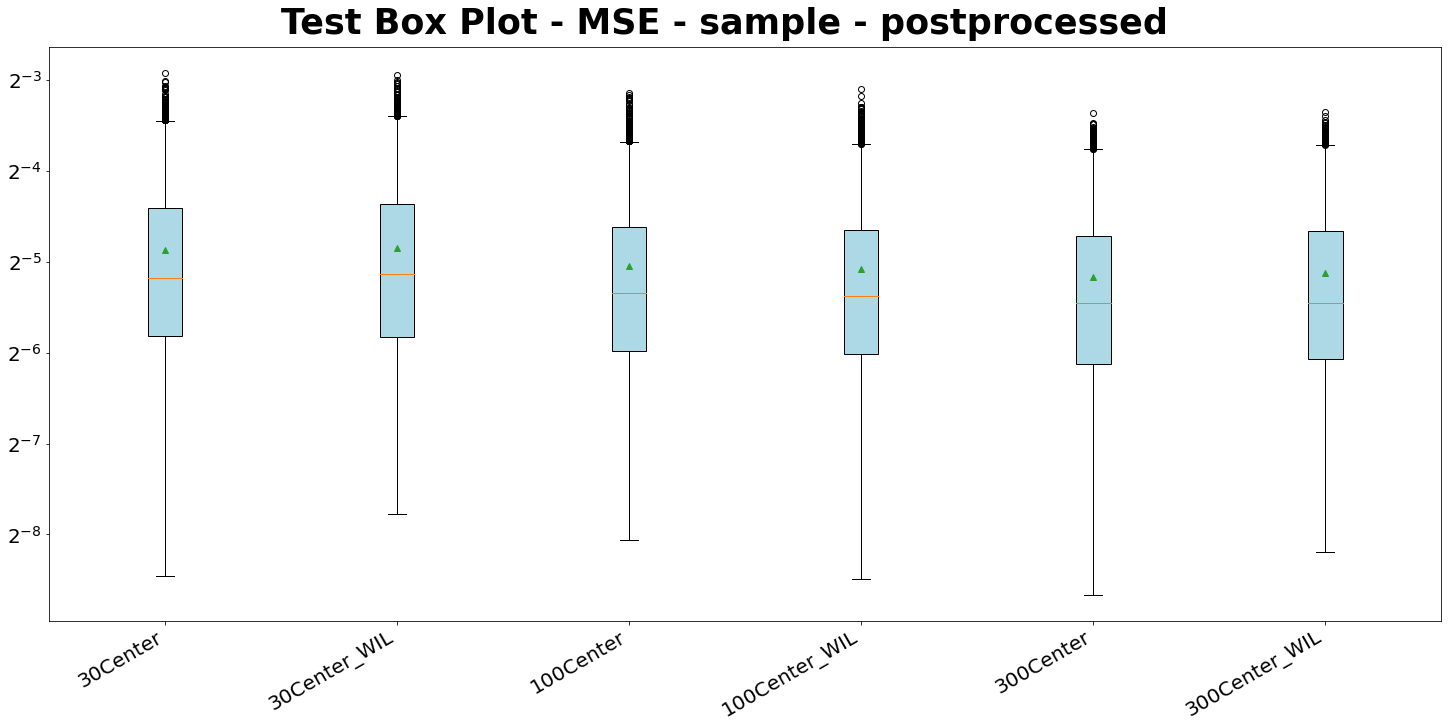

<Figure size 1440x720 with 0 Axes>

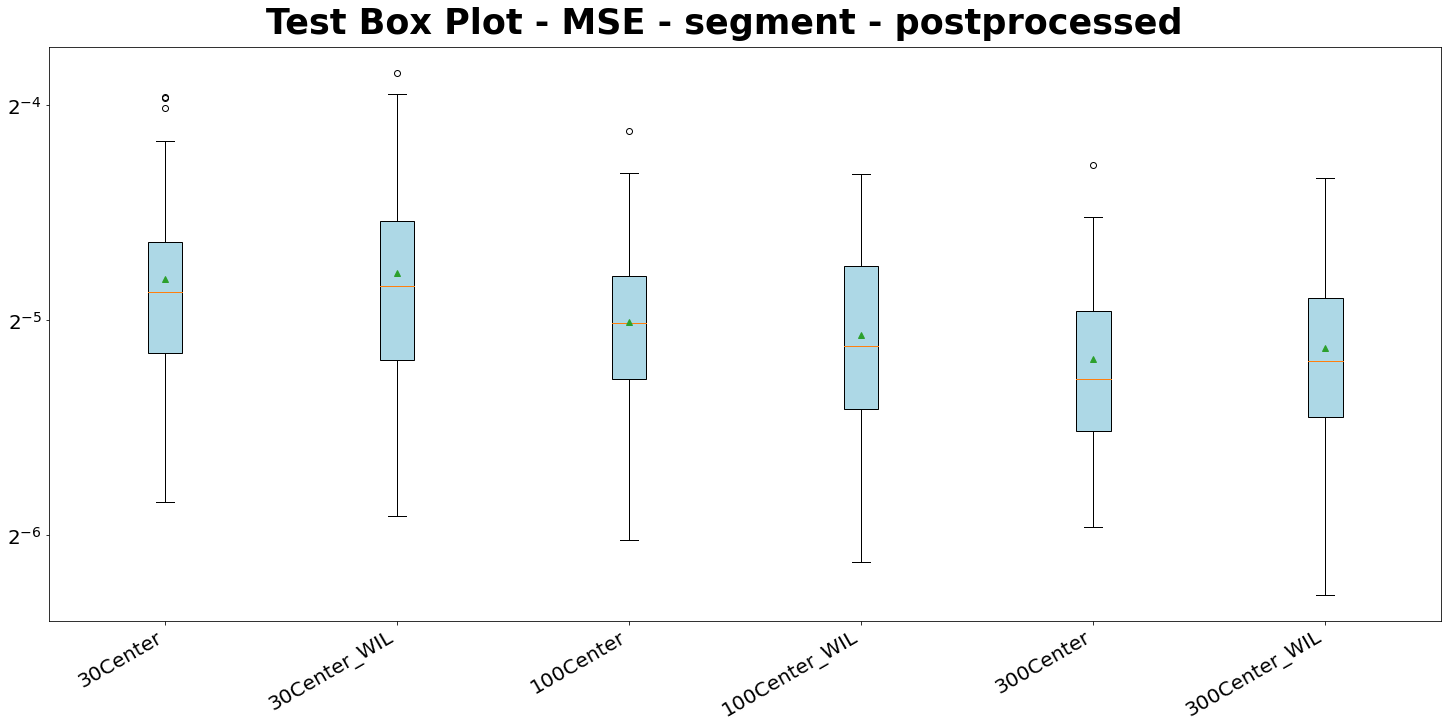

<Figure size 1440x720 with 0 Axes>

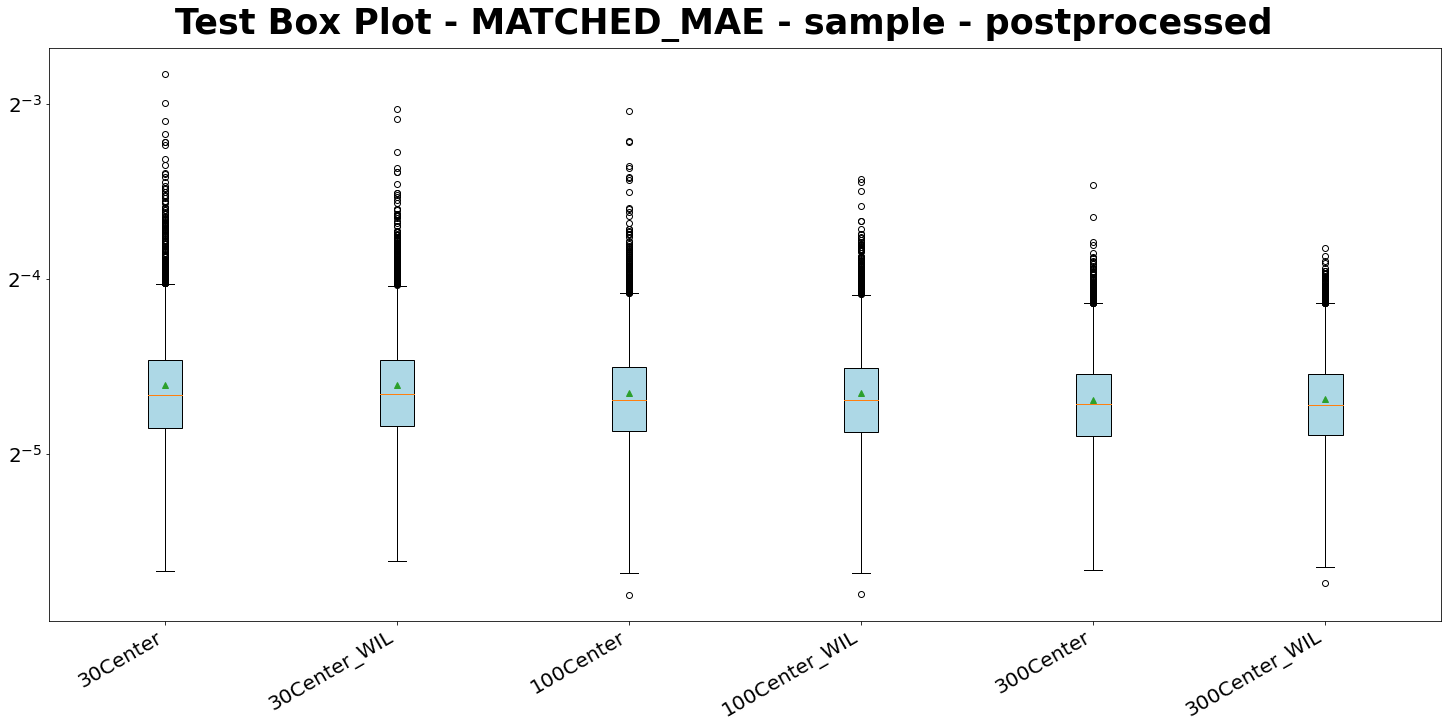

<Figure size 1440x720 with 0 Axes>

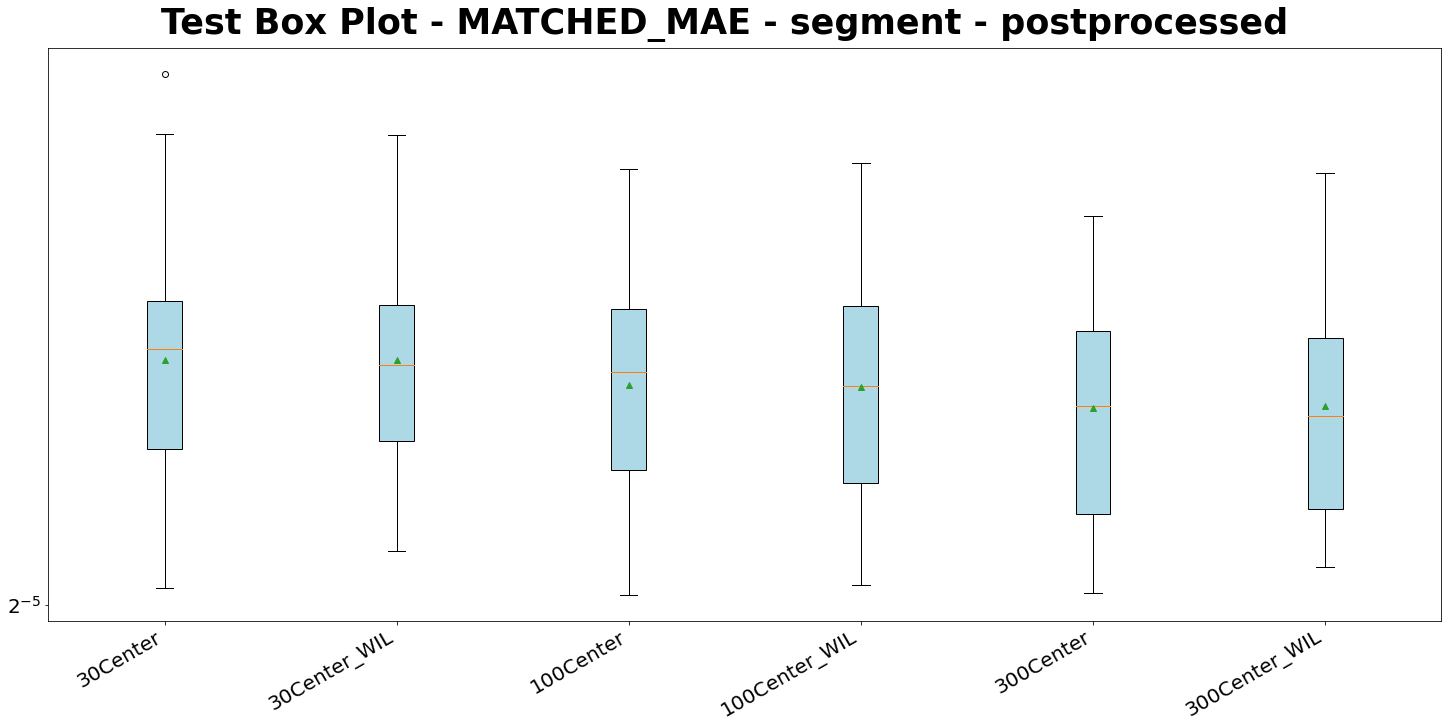

<Figure size 1440x720 with 0 Axes>

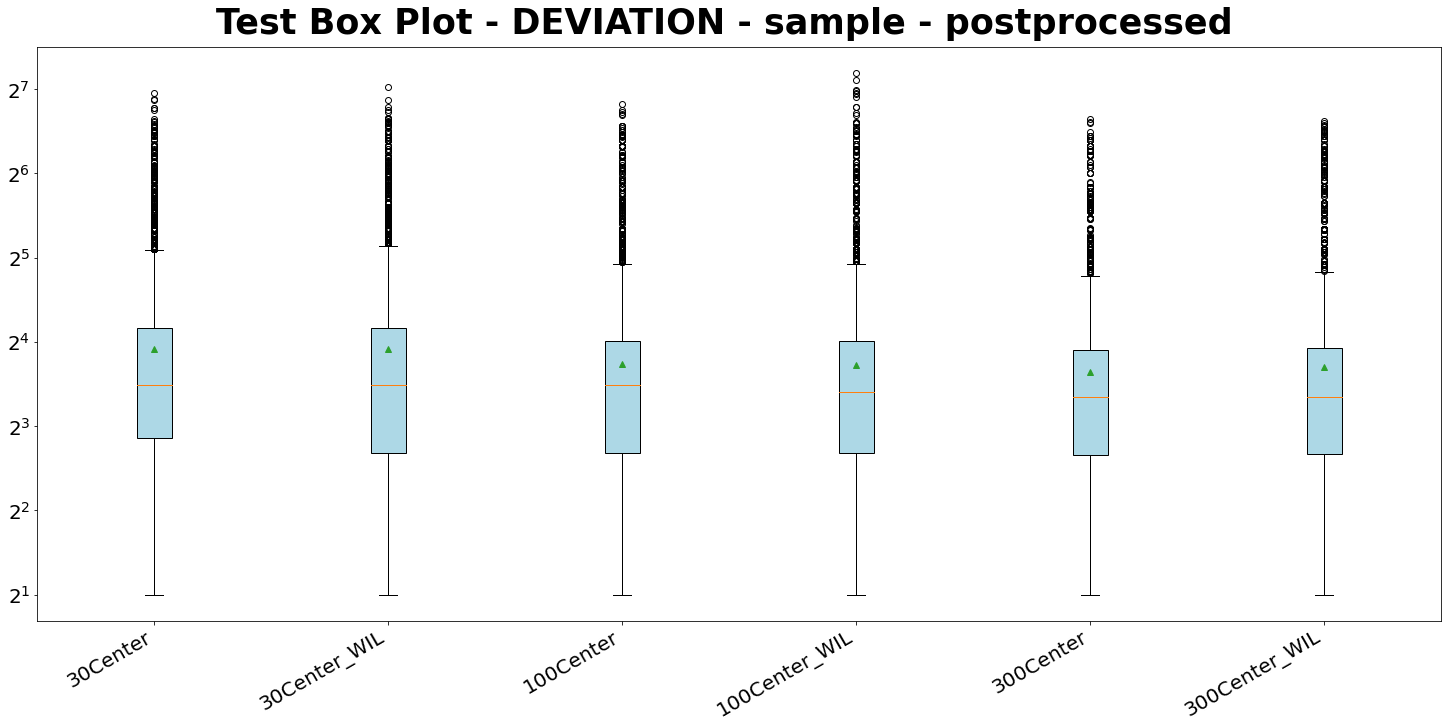

<Figure size 1440x720 with 0 Axes>

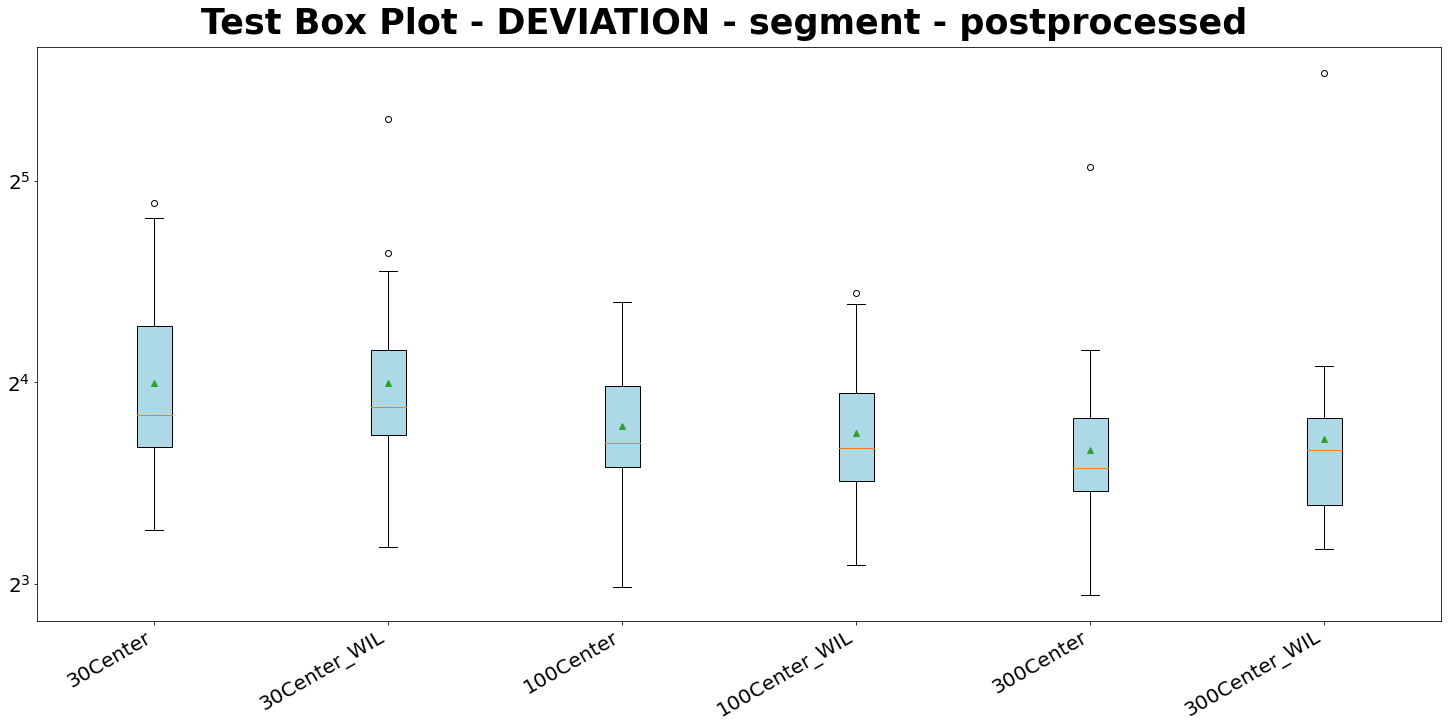

<Figure size 1440x720 with 0 Axes>

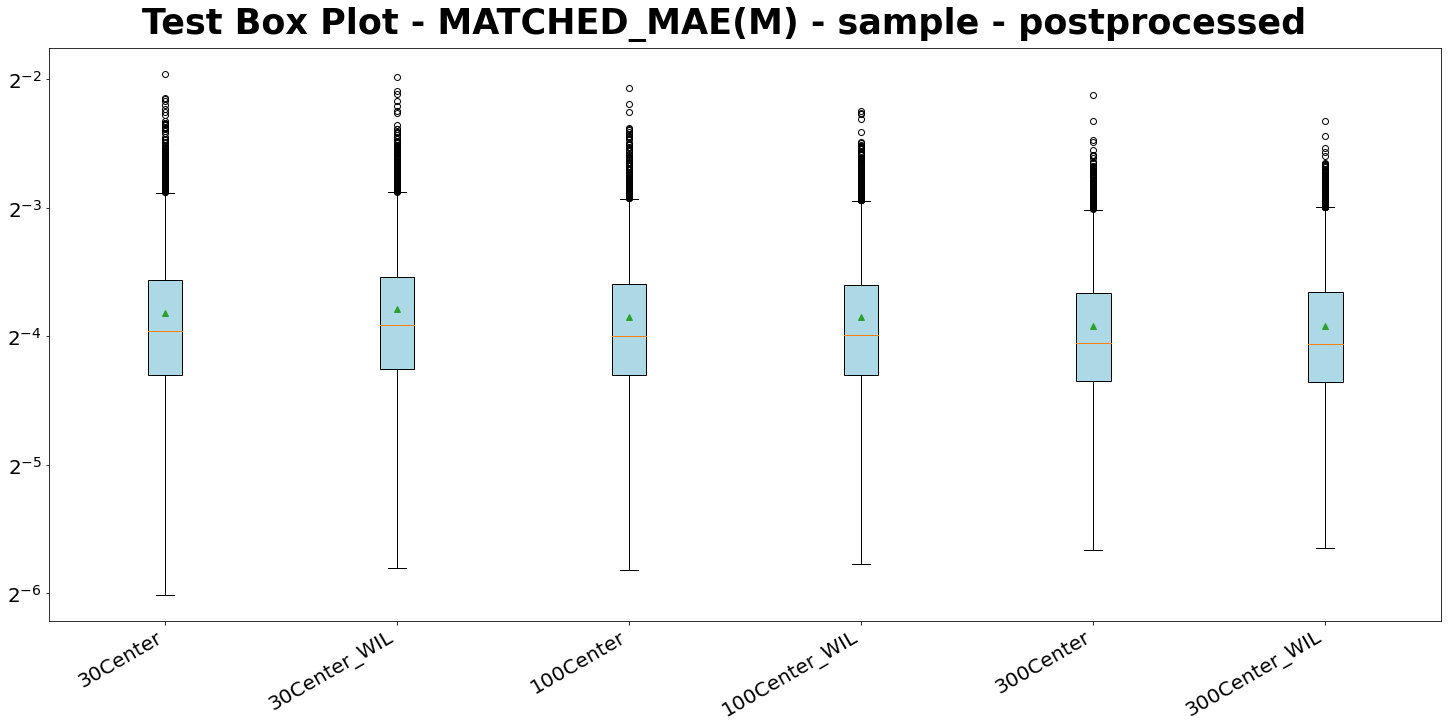

<Figure size 1440x720 with 0 Axes>

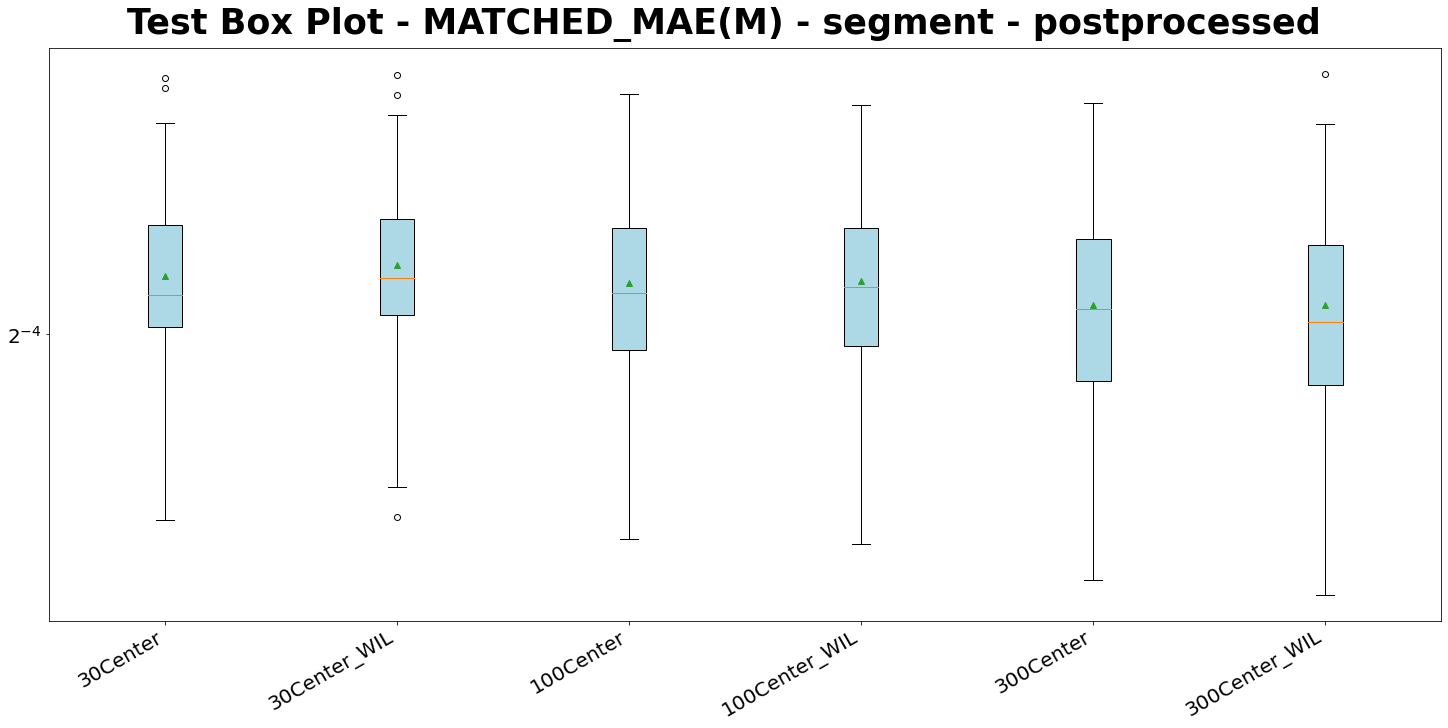

<Figure size 1440x720 with 0 Axes>

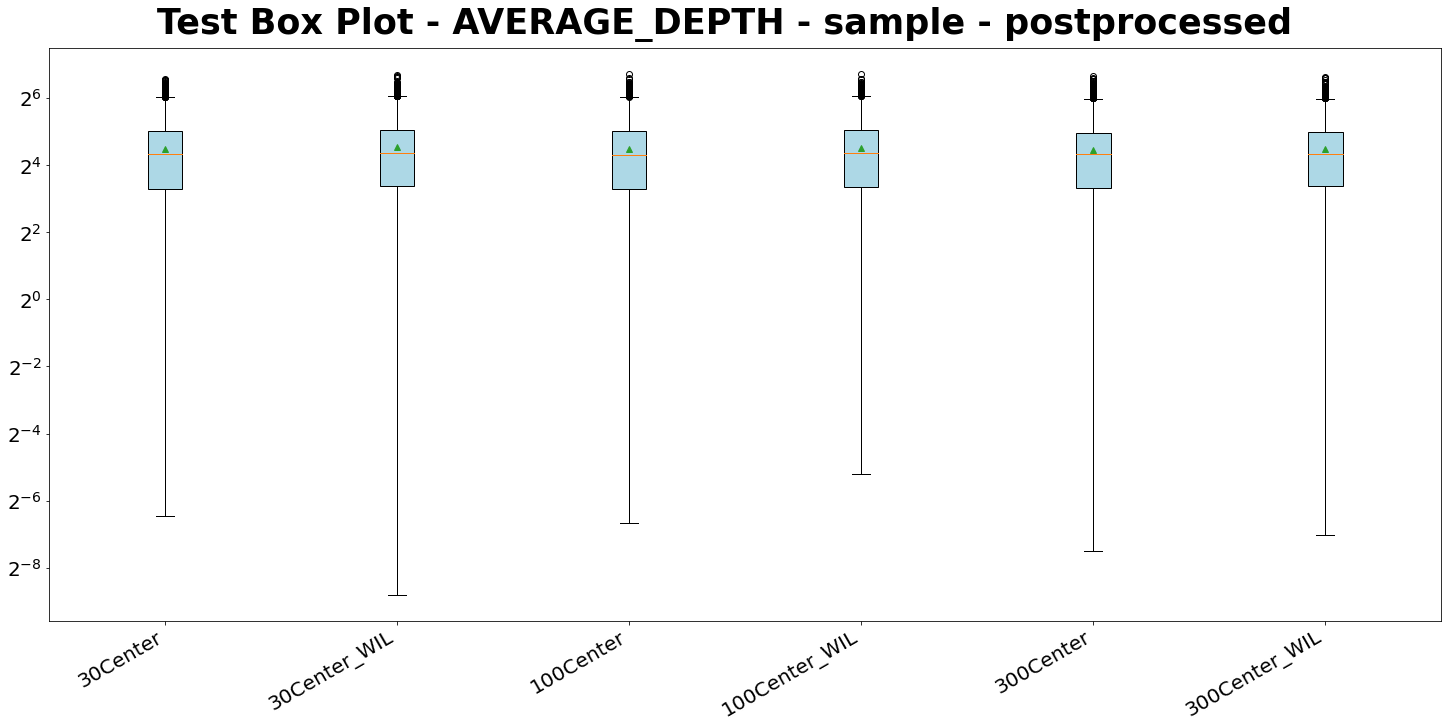

<Figure size 1440x720 with 0 Axes>

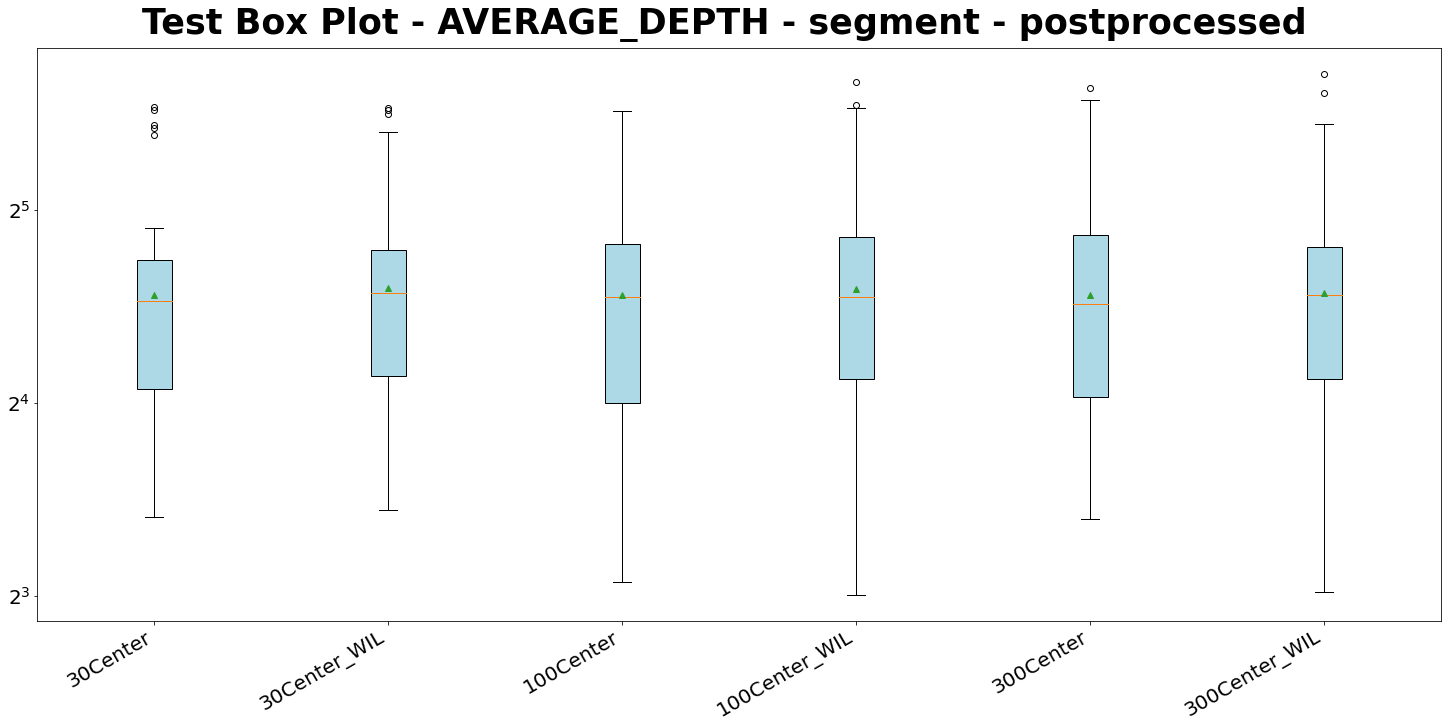

In [9]:
RP.post_process(scope=['30Center', '30Center_WIL', 
                       '100Center', '100Center_WIL', 
                       '300Center', '300Center_WIL'])
RP.segment_mean(scope=['30Center', '30Center_WIL', 
                       '100Center', '100Center_WIL', 
                       '300Center', '300Center_WIL'],
                source='postprocessed')
for item in ('mse', 'matched_mae', 'deviation', 'matched_mae(m)', 'average_depth'):
    for level in ('sample', 'segment'):
        #RP.cdfplot(scope=['30Center', '30Center_IL', '30Center_WIL', '100Center', '100Center_IL', '100Center_WIL', '300Center', '300Center_IL', '300Center_WIL'],
        #           item=item, level=level, source='postprocessed')
        RP.boxplot(scope=['30Center', '30Center_WIL', '100Center', '100Center_WIL', '300Center', '300Center_WIL'],
            item=item, level=level, source='postprocessed')

<Figure size 1440x720 with 0 Axes>

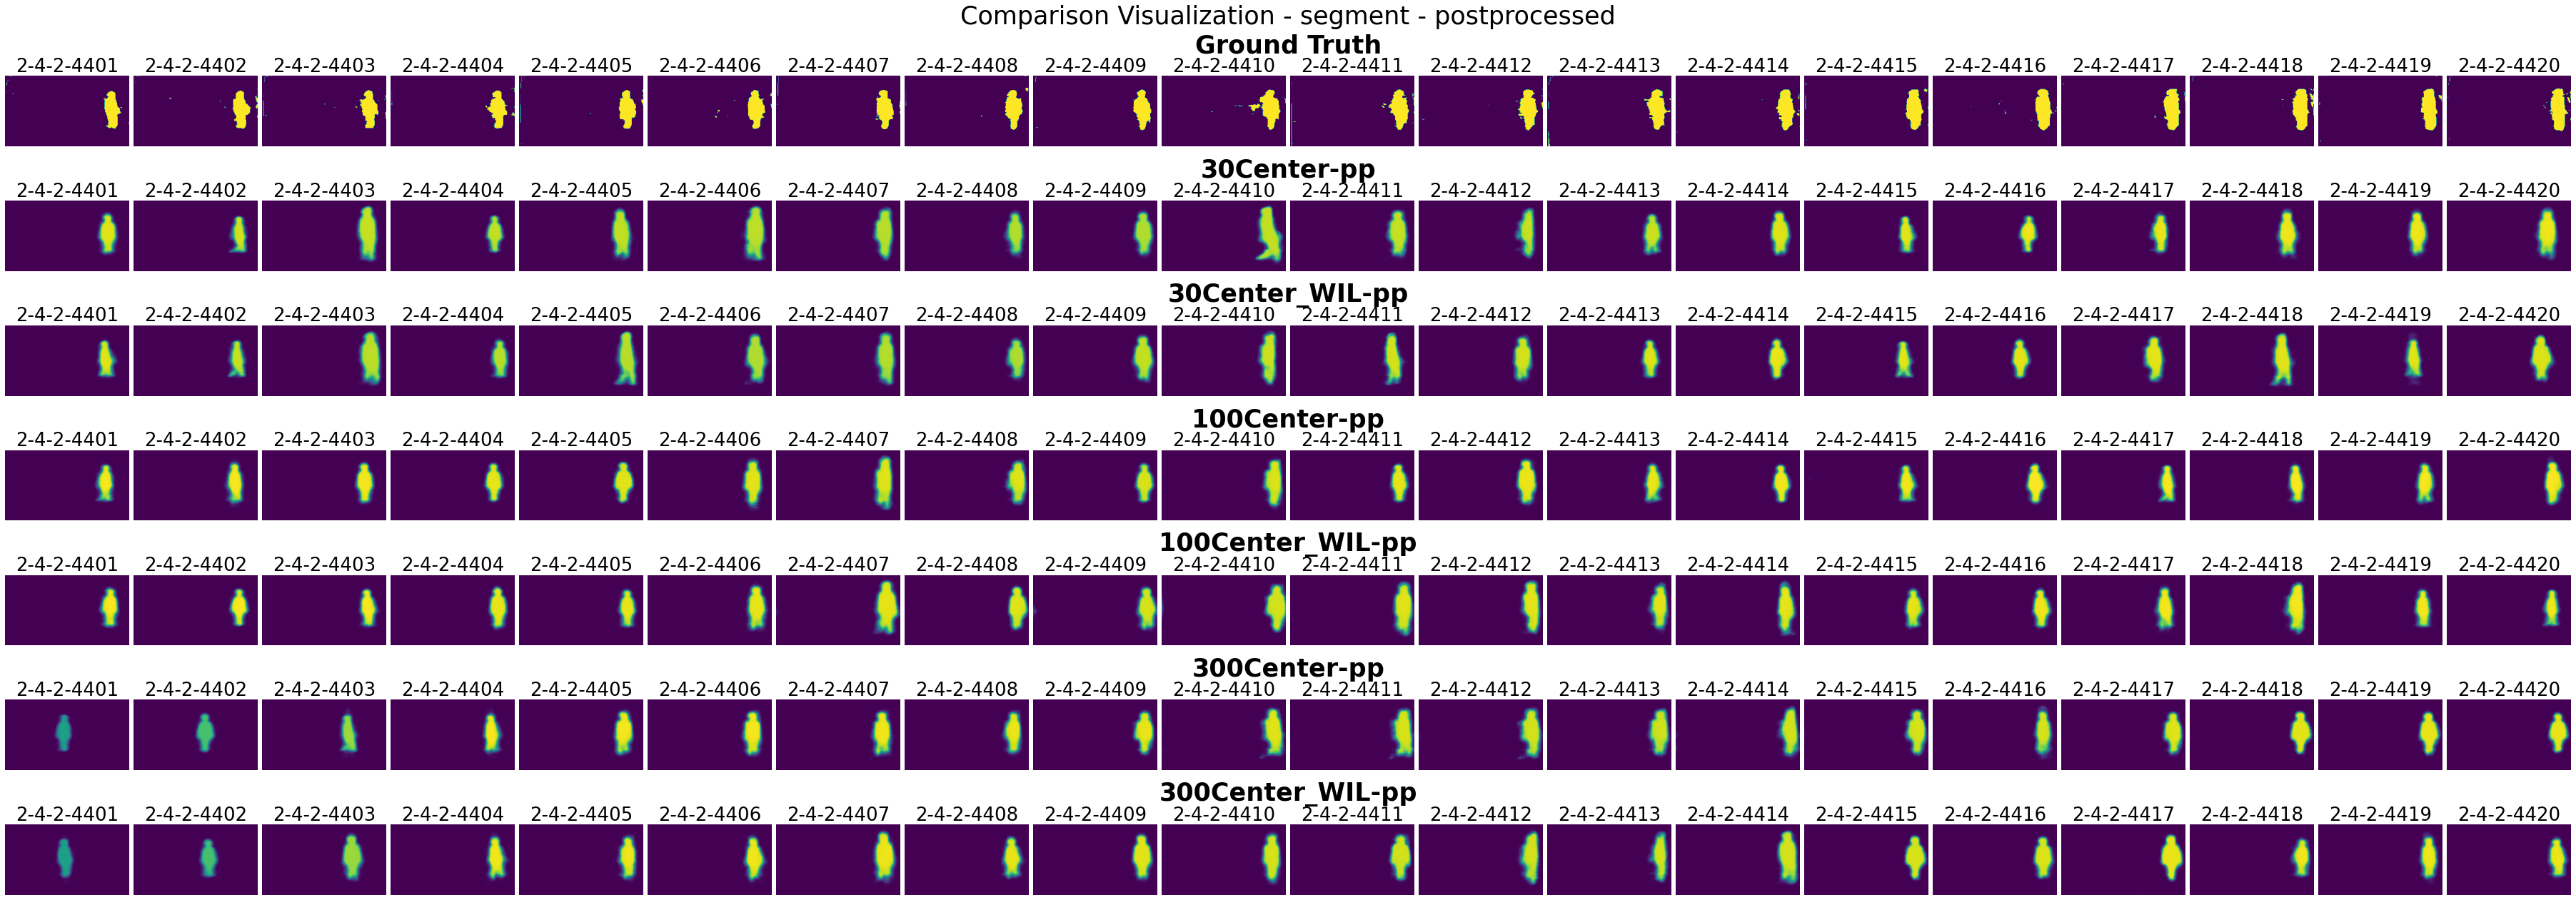

/opt/conda/lib/python3.7/site-packages/numpy/core/shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


<Figure size 3600x1260 with 0 Axes>

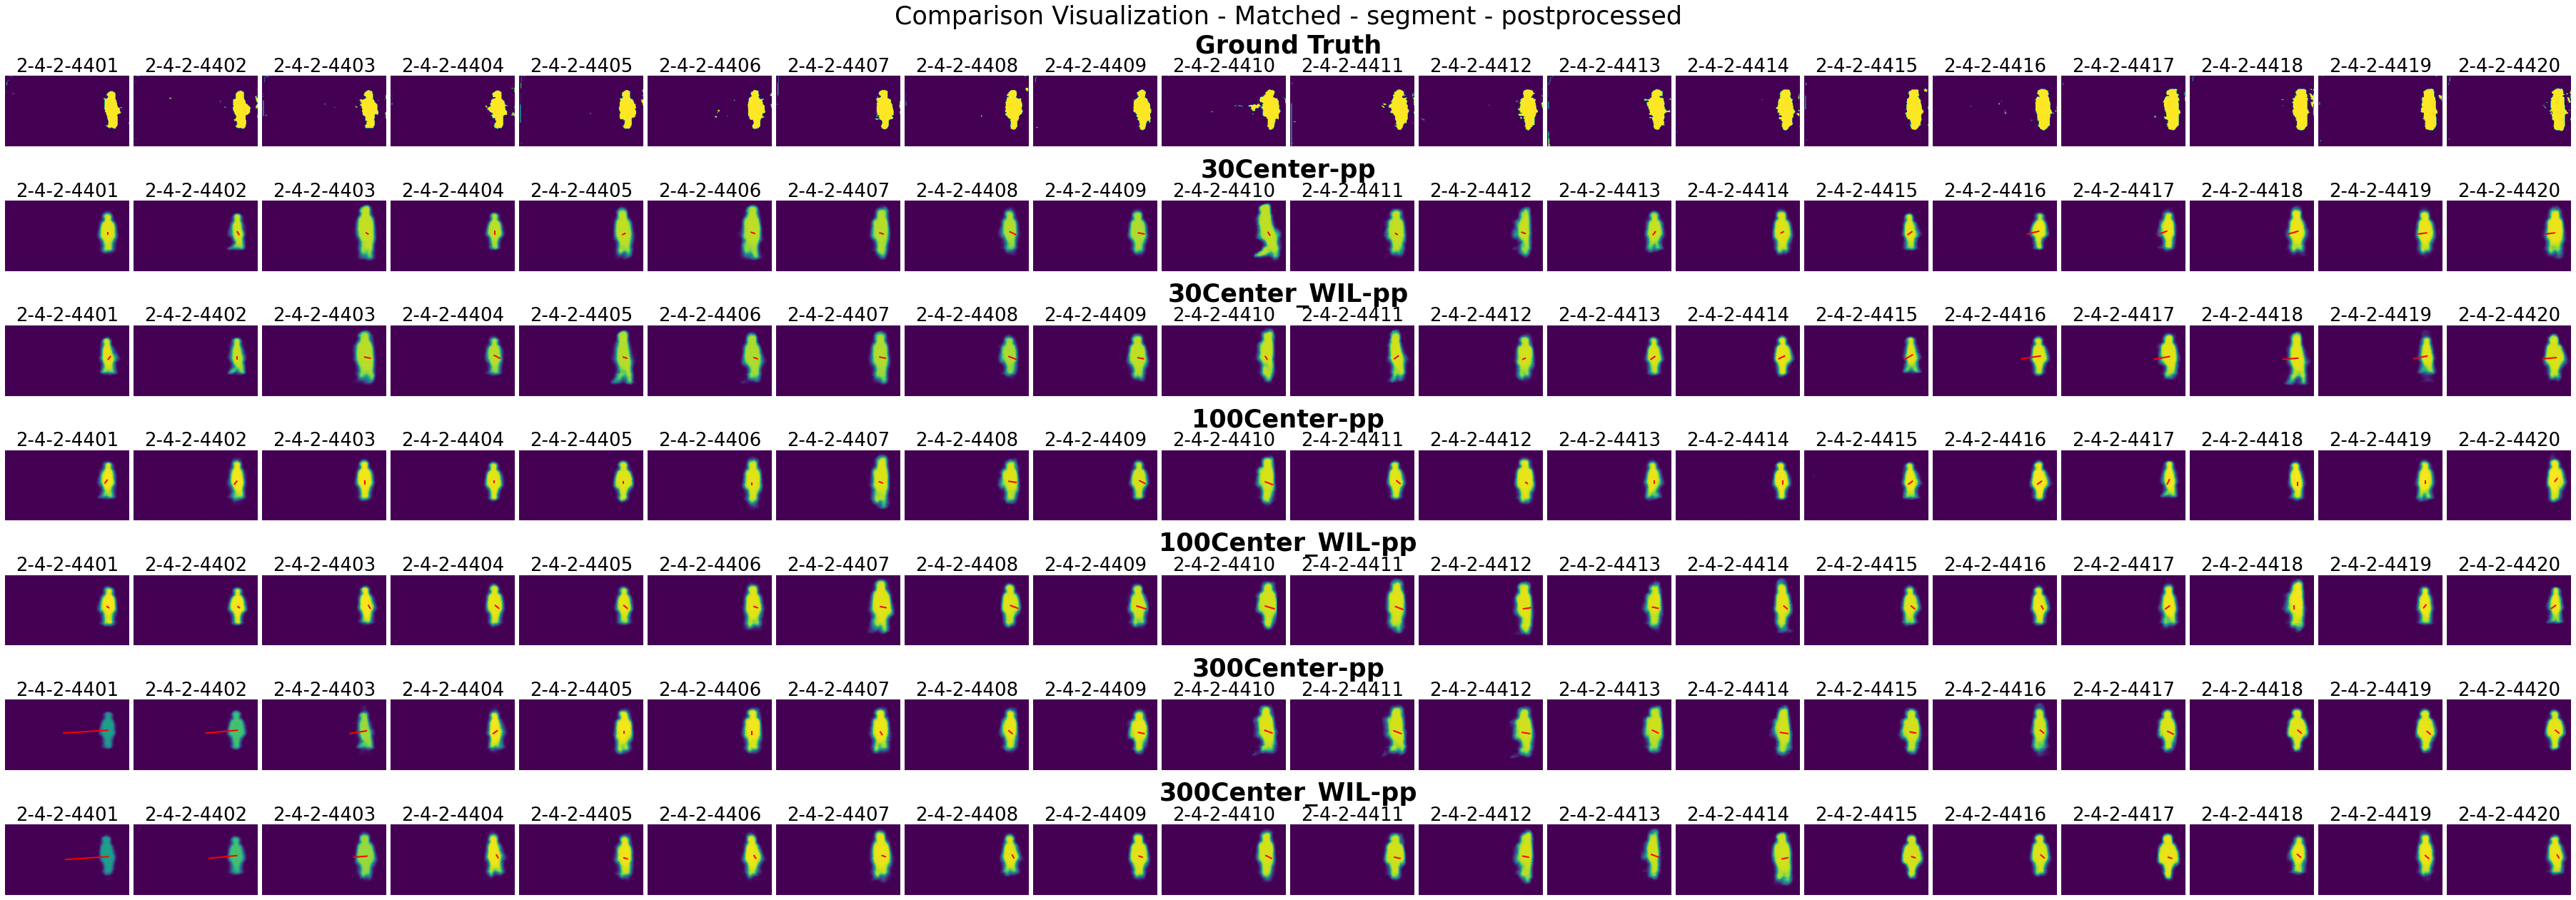

In [10]:
RP.visualize(scope=['30Center', '30Center_WIL', '100Center', '100Center_WIL', '300Center', '300Center_WIL'],
                          #selected=RP.selected_segs, 
             matched=False, level='segment', source='postprocessed')
RP.visualize(scope=['30Center', '30Center_WIL', '100Center', '100Center_WIL', '300Center', '300Center_WIL'],
             #selected=RP.selected_segs, 
             matched=True, level='segment', source='postprocessed')

### Table

In [11]:
RP.average_table()

                vanilla                                                     \
                 sample                                                      
                    mse matched_mae matched_mae(m) average_depth     dev_x   
30Center       0.039298    0.040478       0.070327     22.082799 -5.348886   
100Center        0.0341    0.039609       0.069139     21.748444 -5.136632   
300Center      0.029029    0.038695       0.066089     20.955676 -4.030572   
30Center_WIL   0.039337    0.040719       0.072107     22.798162 -4.434836   
100Center_WIL  0.033264    0.039584        0.06925     22.235328 -4.644401   
300Center_WIL   0.02971    0.038646       0.066067     21.237672 -5.362144   
300BBX_FP      0.027846    0.039147       0.053893     24.656885 -4.914323   
AE             0.034917    0.042238       0.091053     48.259391 -6.680758   

                                                                         ...  \
                                     segment                 

In [12]:
RP.save('240702_Comp')

In [13]:
for sub in RP.subjects.values():
    sub.save('240702_Comp')

30Center saving...Done!
100Center saving...Done!
300Center saving...Done!
30Center_WIL saving...Done!
100Center_WIL saving...Done!
300Center_WIL saving...Done!
300BBX_FP saving...Done!
AE saving...Done!


<Figure size 3600x1260 with 0 Axes>

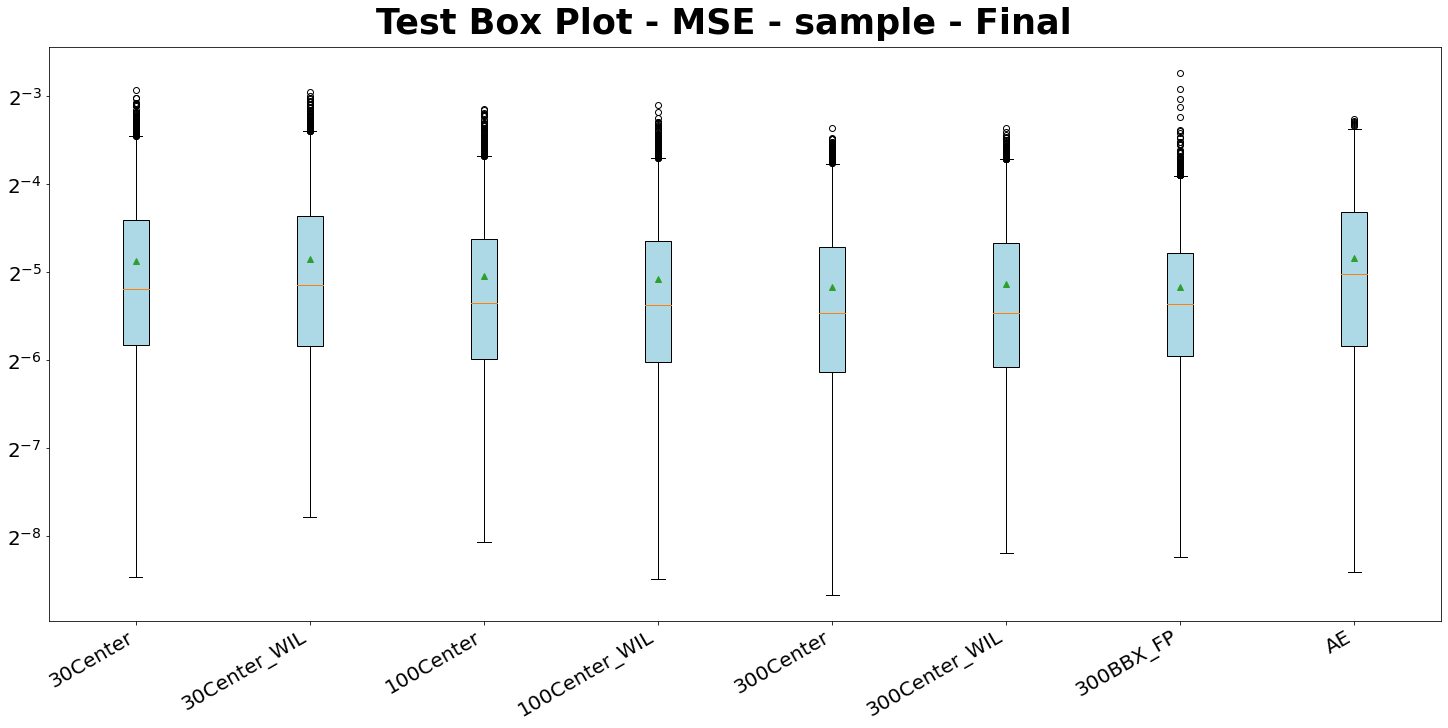

<Figure size 1440x720 with 0 Axes>

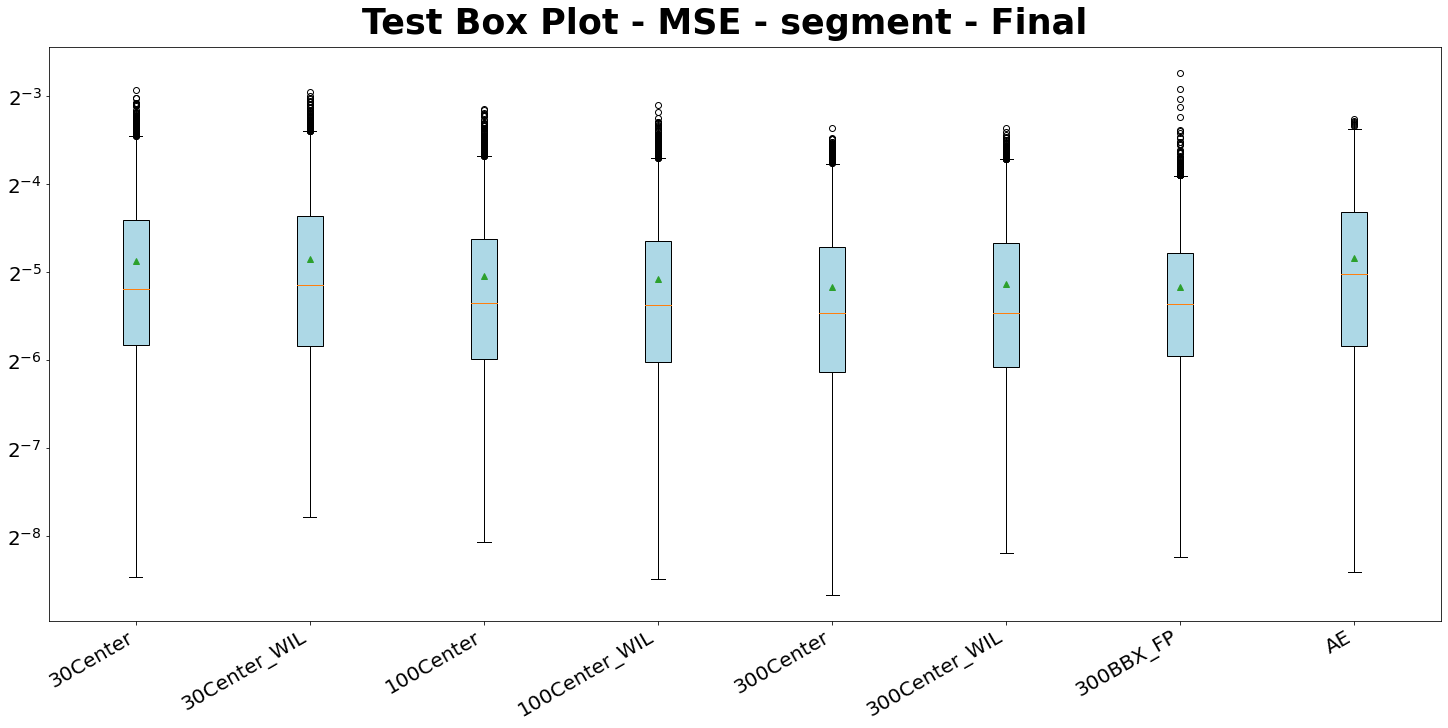

<Figure size 1440x720 with 0 Axes>

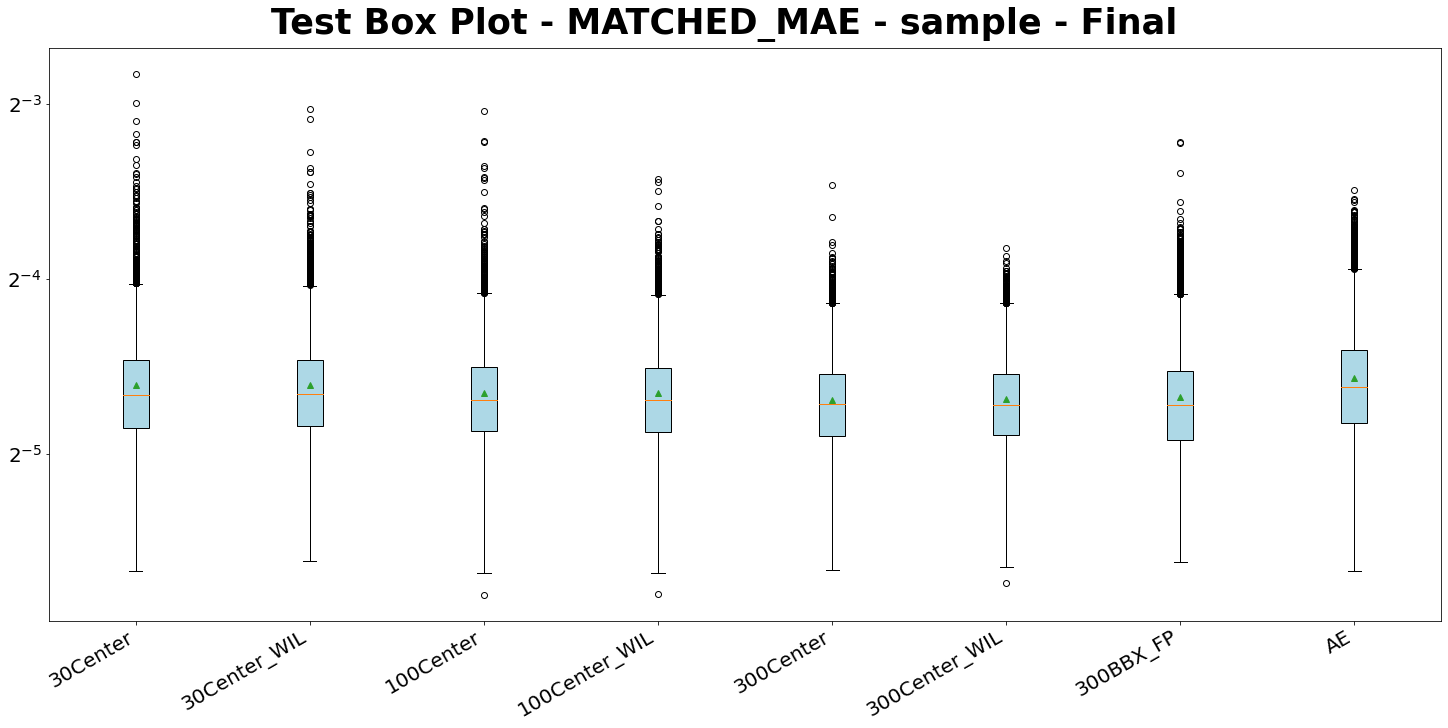

<Figure size 1440x720 with 0 Axes>

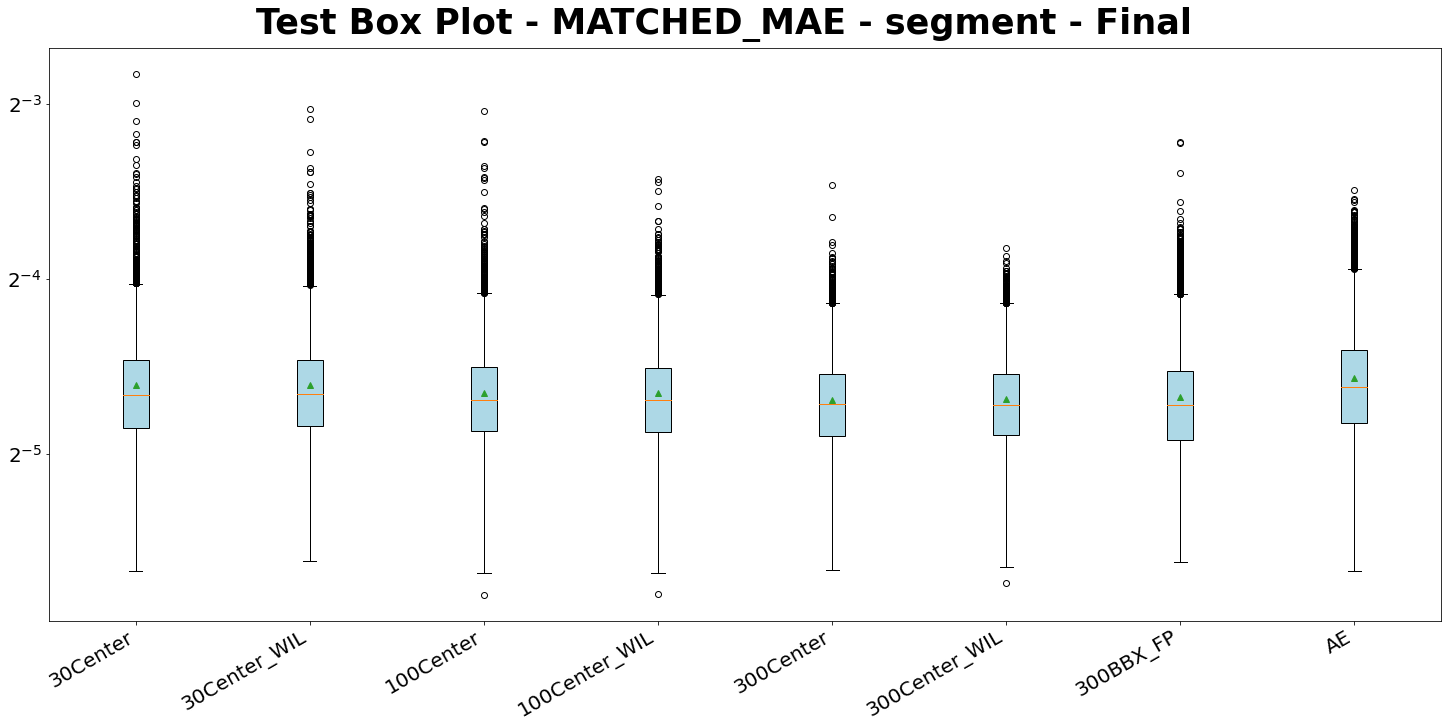

<Figure size 1440x720 with 0 Axes>

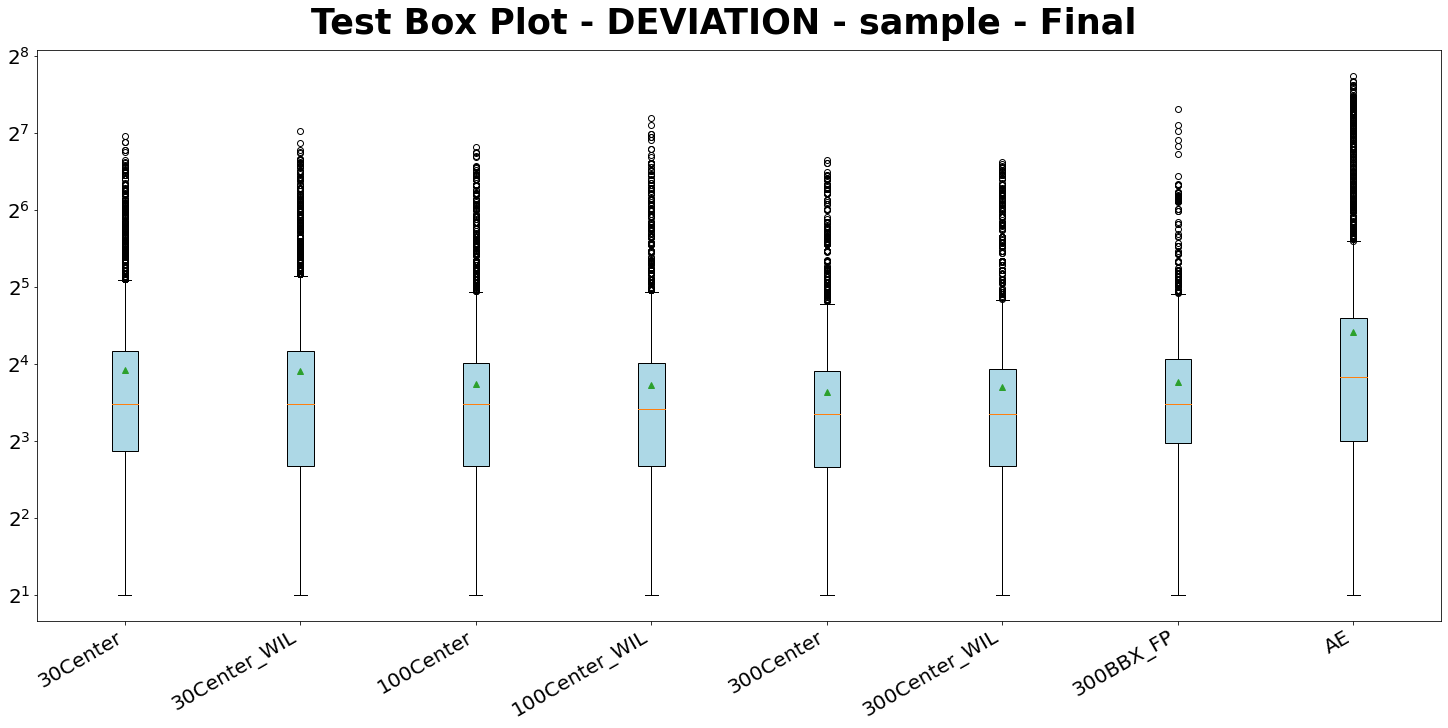

<Figure size 1440x720 with 0 Axes>

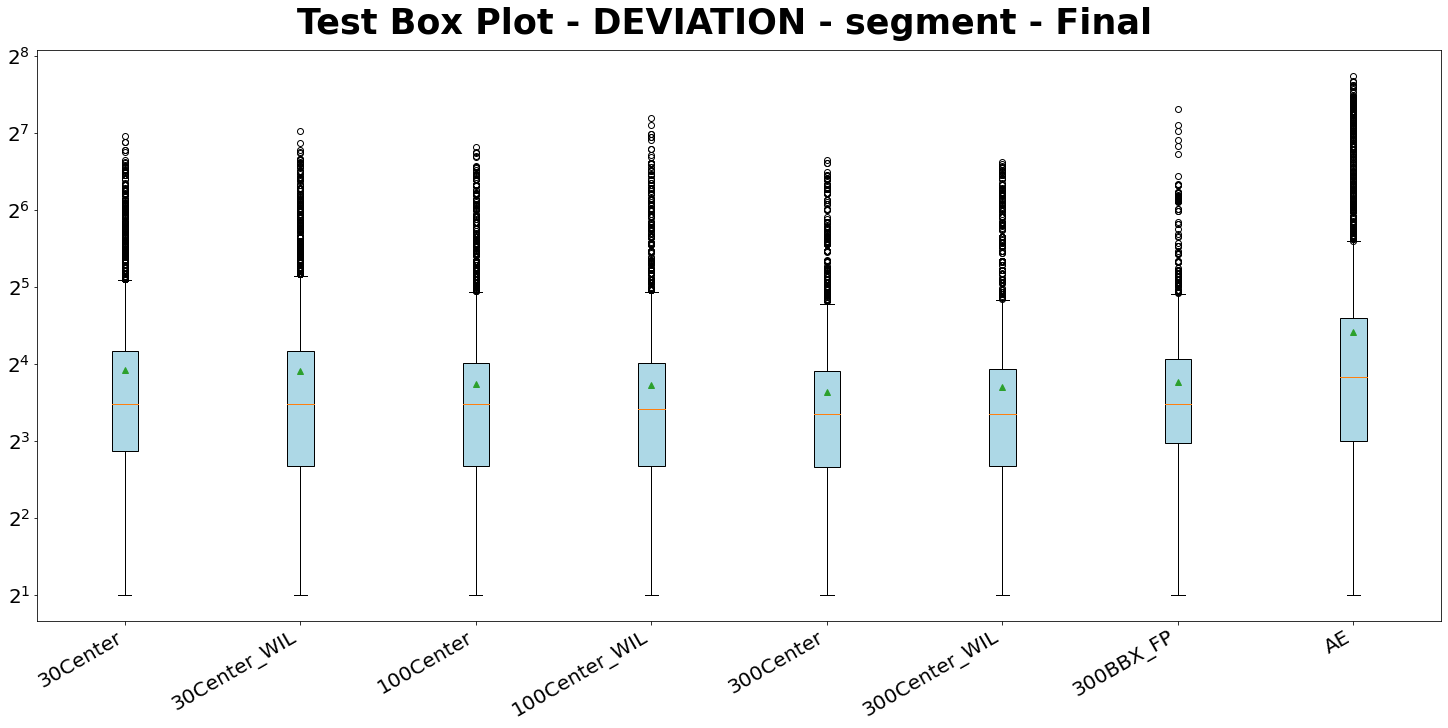

<Figure size 1440x720 with 0 Axes>

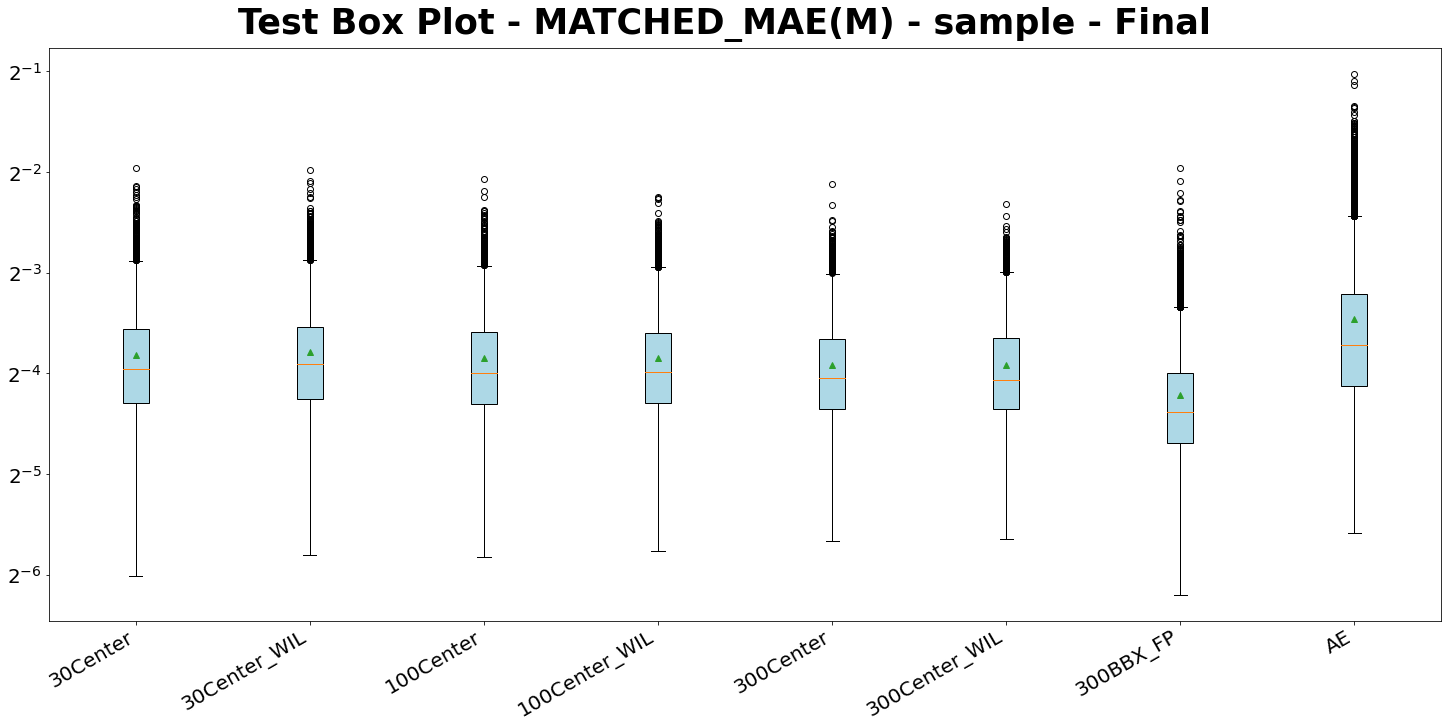

<Figure size 1440x720 with 0 Axes>

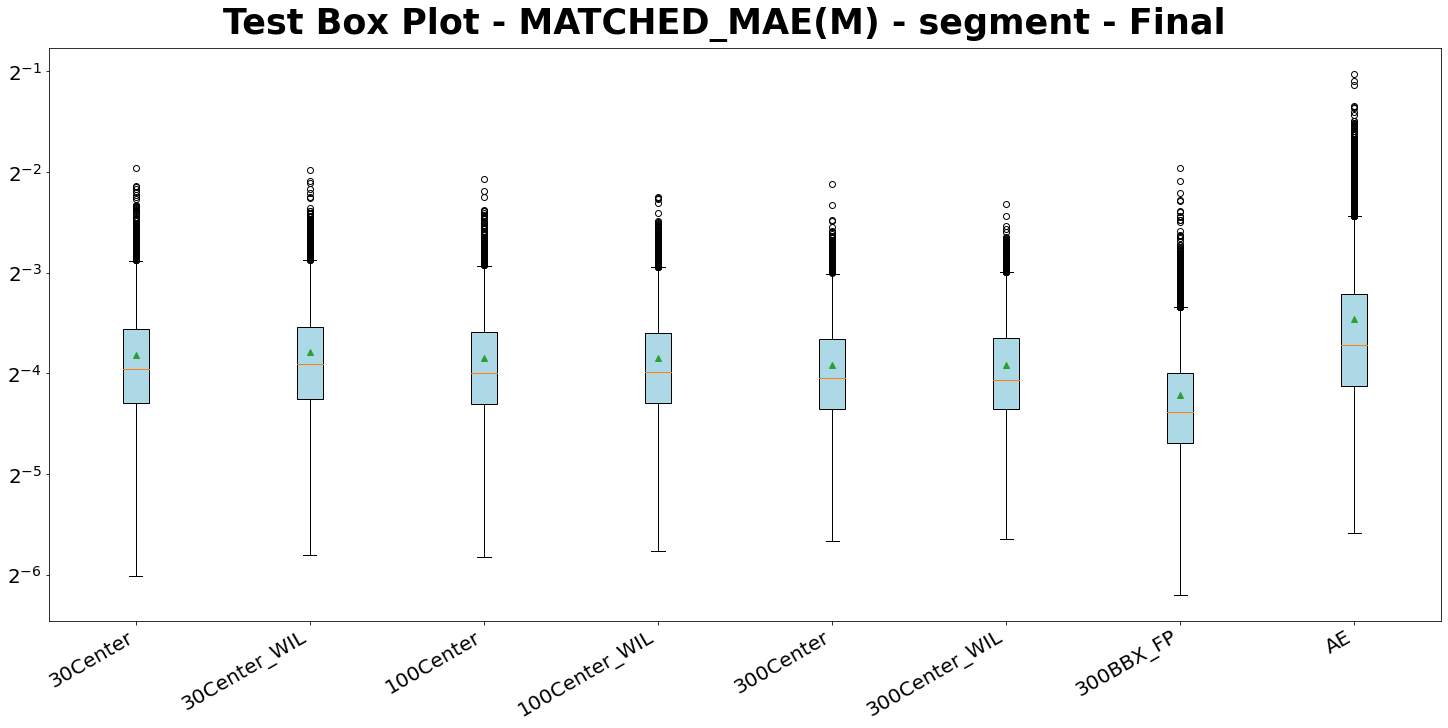

<Figure size 1440x720 with 0 Axes>

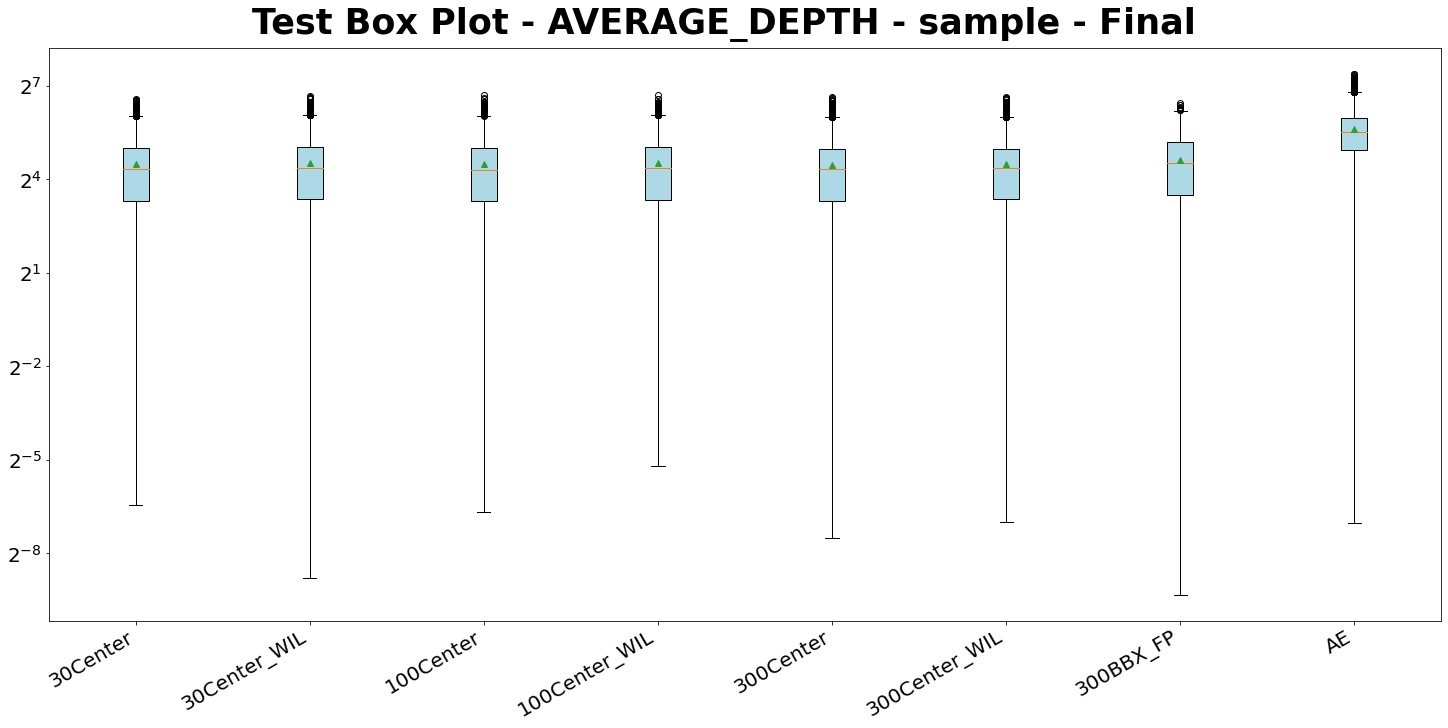

<Figure size 1440x720 with 0 Axes>

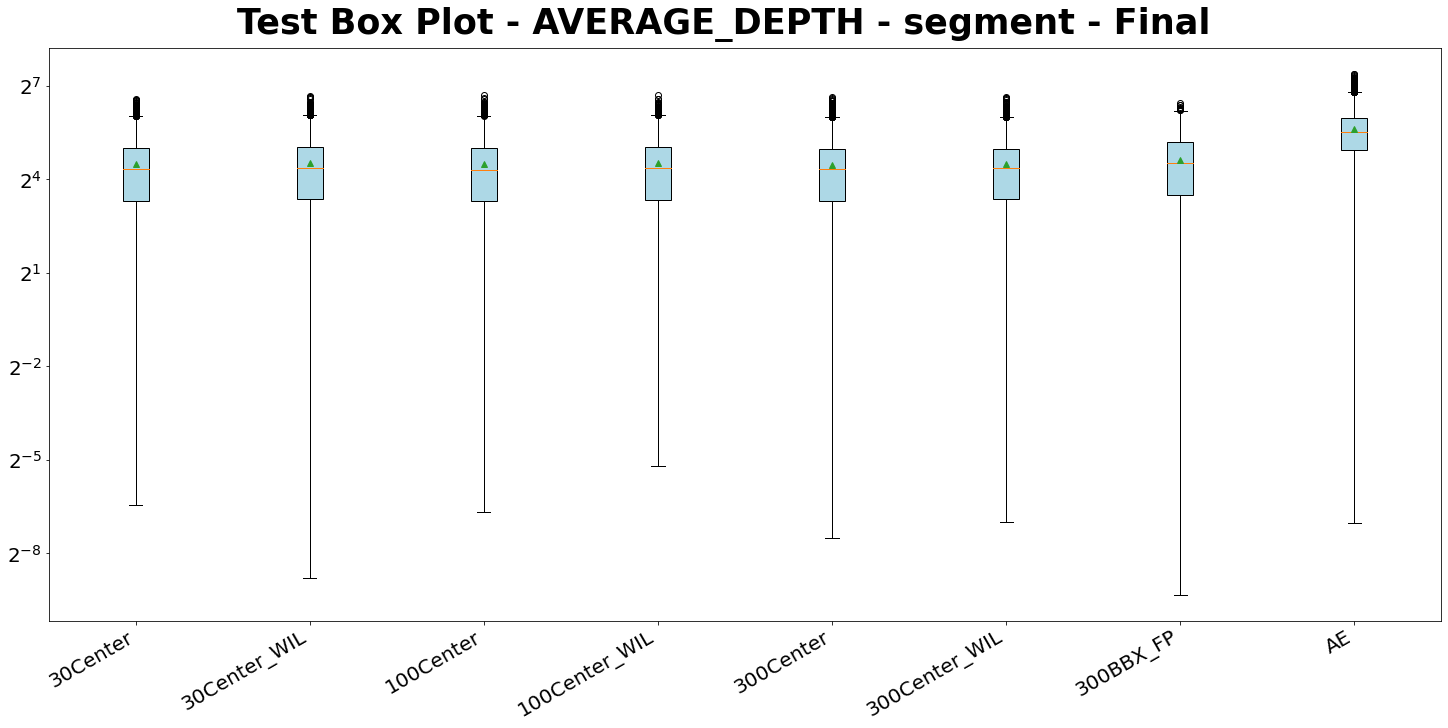

In [12]:
for item in ('mse', 'matched_mae', 'deviation', 'matched_mae(m)', 'average_depth'):
    for level in ('sample', 'segment'):
        RP.boxplot(scope=[['30Center', item, 'segment', 'postprocessed'],
                          ['30Center_WIL', item, 'segment', 'postprocessed'],
                          ['100Center', item, 'segment', 'postprocessed'], 
                          ['100Center_WIL', item, 'segment', 'postprocessed'], 
                          ['300Center', item, 'segment', 'postprocessed'], 
                          ['300Center_WIL', item, 'segment', 'postprocessed'],

                          ['300BBX_FP', item, 'segment', 'vanilla'],
                          ['AE', item, 'segment', 'vanilla'],
                         ],
                    customize=f'{item.upper()} - {level} - Final')